<a href="https://colab.research.google.com/github/NontapornWong/IS_player_lineup_classifier/blob/main/Implement_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚽MIDFIELDER IN MANCHERTER UNITED⚽
## DATA FROM 2022-2023 
![Alt Text](https://icdn.strettynews.com/wp-content/uploads/2023/04/8F703EEF-D7F7-4719-803D-F9AE395DE1DE.jpeg)
Reference: https://fbref.com/, https://www.manutd.com/

## MIDFILDER 2022-2023 Match Logs (Summary)
### 🚩Performance 
- **Gls**	Goals
- **Ast**	Assits
- **PK**    Penalty kicks made
- **PKatt**	Penalty kicks attemp
- **Sh**	Shot totals 
- **SoT**	Shot on target
- **CrdY**	Yellow card
- **CrdR**	Red card
- **Touches** Number of time players touch the ball
- **Tkl**   Tackles
- **Int**   Interceptions
- **Blocks** Number of times blocking the ball

### 🚩Expected
- **xG** Expected Goals xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.
- **npxG**	Non-Penalty xG</strong><br><strong>Non-Penalty Expected Goals</strong><br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.
- **xAG** Expected Assisted Goals</strong><br>xG which follows a pass that assists a shot<br>Provided by Opta.<br>An underline indicates there is a match that is missing data, but will be updated when available.

### 🚩SCA
- <strong>Shot-Creating Actions (SCA)</strong><br>Shot-Creating Actions<br>The two offensive actions directly leading to a shot, such as passes, take-ons and drawing fouls. Note: A single player can receive credit for multiple actions and the shot-taker can also receive credit.
- <strong>Goal-Creating Actions (GCA)</strong><br>Goal-Creating Actions<br>The two offensive actions directly leading to a goal, such as passes, take-ons and drawing fouls. Note: A single player can receive credit for multiple actions and the shot-taker can also receive credit.

### 🚩Passes
- **Cmp** Passes Completed
- **Att** Passes Attempted
- **Cmp%** </strong><br>Pass Completion Percentage<br>Minimum 30 minutes played per squad game to qualify as a leader
- **PrgP** </strong><br>Progressive Passes<br>Completed passes that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch

### 🚩Carries
- **Carries**	Number of times the player controlled the ball with their feet
- **PrgC**  <strong>Progressive Carries</strong><br>Carries that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any carry into the penalty area. Excludes carries which end in the defending 50% of the pitch

### 🚩Take-Ons	
- **Att.1**	<strong>Take-Ons Attempted</strong><br>Number of attempts to take on defenders while dribbling
- **Succ** <strong>Successful Take-Ons</strong><br>Number of defenders taken on successfully, by dribbling past them<br>Unsuccessful take-ons include attempts where the dribbler retained possession but was unable to get past the defender

In [1]:
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set_theme()

df_bruno = pd.read_csv(r'/content/gdrive/MyDrive/IS/Fernandes.txt', delimiter=',')
df_eriksen = pd.read_csv(r'/content/gdrive/MyDrive/IS/Eriksen.txt', delimiter=',')
df_marcel = pd.read_csv(r'/content/gdrive/MyDrive/IS/marcel.txt', delimiter=',')
df_case = pd.read_csv(r'/content/gdrive/MyDrive/IS/casemiro.txt', delimiter=',')
df_facun = pd.read_csv(r'/content/gdrive/MyDrive/IS/facundo.txt', delimiter=',')
df_mcto = pd.read_csv(r'/content/gdrive/MyDrive/IS/mctominay.txt', delimiter=',')
df_fred = pd.read_csv(r'/content/gdrive/MyDrive/IS/fred.txt', delimiter=',')
df_beek = pd.read_csv(r'/content/gdrive/MyDrive/IS/de_beek.txt', delimiter=',')

In [3]:
df_bruno['Player'] = 'Bruno Fernandes'
df_eriksen['Player'] = 'Christian Eriksen'
df_marcel['Player'] = 'Marcel Sabitzer'
df_case['Player'] = 'Casemiro'
df_facun['Player'] = 'Facundo Pellistri'
df_mcto['Player'] = 'Scott McTominay'
df_fred['Player'] = 'Fred'
df_beek['Player'] = 'Donny van de Beek'

In [4]:
frames = [df_bruno, df_eriksen, df_marcel, df_case, df_facun, df_mcto, df_fred, df_beek]
df_cc = pd.concat(frames, axis=0)

In [5]:
print(f'There are {df_cc.shape[0]} Row and {df_cc.shape[1]} Columns')

There are 325 Row and 38 Columns


In [6]:
df_cc.head(10)

Date  Day                 Comp        Round Venue Result  \
0  2022-06-02  Thu  UEFA Nations League     League A  Away  D 1–1   
1  2022-06-05  Sun  UEFA Nations League     League A  Home  W 4–0   
2  2022-06-09  Thu  UEFA Nations League     League A  Home  W 2–0   
3  2022-06-12  Sun  UEFA Nations League     League A  Away  L 0–1   
4  2022-08-07  Sun       Premier League  Matchweek 1  Home  L 1–2   
5  2022-08-13  Sat       Premier League  Matchweek 2  Away  L 0–4   
6  2022-08-22  Mon       Premier League  Matchweek 3  Home  W 2–1   
7  2022-08-27  Sat       Premier League  Matchweek 4  Away  W 1–0   
8  2022-09-01  Thu       Premier League  Matchweek 5  Away  W 1–0   
9  2022-09-04  Sun       Premier League  Matchweek 6  Home  W 3–1   

            Squad           Opponent Start   Pos  ...   Cmp   Att  Cmp%  PrgP  \
0     pt Portugal           es Spain     Y    CM  ...   NaN   NaN   NaN   NaN   
1     pt Portugal     ch Switzerland     Y    FW  ...   NaN   NaN   NaN   NaN   
2     pt Portugal  cz Czech Republic     N   NaN  ...   NaN   NaN   NaN   NaN   
3     pt Portugal     ch Switzerland     Y    CM  ...   NaN   NaN   NaN   NaN   
4  Manchester Utd           Brighton     Y    LM  ...  55.0  72.0  76.4  16.0   
5  Manchester Utd          Brentford     Y    AM  ...  47.0  57.0  82.5   7.0   
6  Manchester Utd          Liverpool    Y*  AMRW  ...  26.0  40.0  65.0   6.0   
7  Manchester Utd        Southampton    Y*  AMRW  ...  26.0  40.0  65.0   7.0   
8  Manchester Utd     Leicester City    Y*  AMRW  ...  44.0  62.0  71.0  12.0   
9  Manchester Utd            Arsenal    Y*  AMRW  ...  22.0  31.0  71.0   3.0   

   Carries  PrgC  Att.1  Succ  Match Report           Player  
0      NaN   NaN    NaN   NaN  Match Report  Bruno Fernandes  
1      NaN   NaN    NaN   NaN  Match Report  Bruno Fernandes  
2      NaN   NaN    NaN   NaN  Match Report  Bruno Fernandes  
3      NaN   NaN    NaN   NaN  Match Report  Bruno Fernandes  
4     46.0   6.0    3.0   2.0  Match Report  Bruno Fernandes  
5     35.0   1.0    0.0   0.0  Match Report  Bruno Fernandes  
6     28.0   2.0    1.0   0.0  Match Report  Bruno Fernandes  
7     27.0   2.0    1.0   1.0  Match Report  Bruno Fernandes  
8     43.0   5.0    4.0   1.0  Match Report  Bruno Fernandes  
9     22.0   0.0    0.0   0.0  Match Report  Bruno Fernandes  

[10 rows x 38 columns]

### Clean Data 

In [7]:
df_cc.isnull().sum()

Date             21
Day              21
Comp             21
Round            21
Venue            21
Result           20
Squad            21
Opponent         21
Start            20
Pos              44
Min              20
Gls              20
Ast              20
PK               20
PKatt            20
Sh               28
SoT              28
CrdY             20
CrdR             20
Touches         104
Tkl             104
Int              29
Blocks          104
xG              104
npxG            104
xAG             104
SCA             104
GCA             104
Cmp             104
Att             104
Cmp%            105
PrgP            104
Carries         104
PrgC            104
Att.1           104
Succ            104
Match Report     21
Player            0
dtype: int64

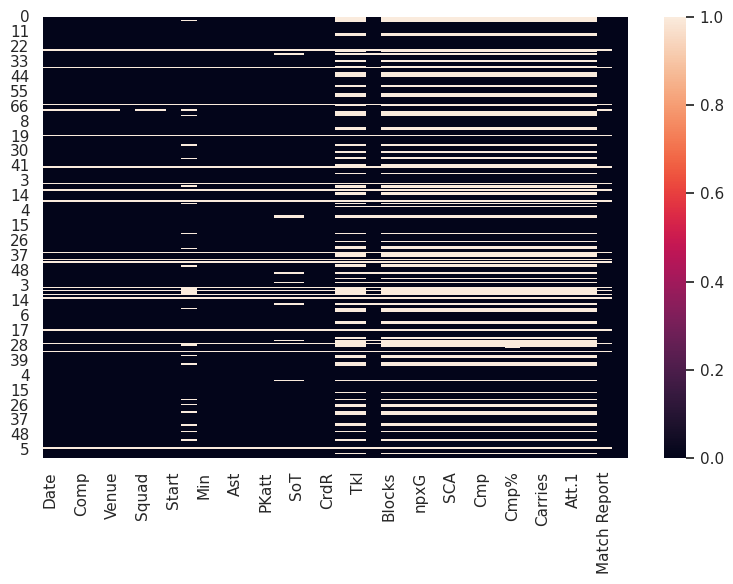

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cc.isnull(), ax=ax)
plt.tight_layout()
plt.show()

In [9]:

df_cc['Squad'].unique()

array(['pt Portugal', 'Manchester Utd', 'eng Manchester Utd', nan,
       'dk Denmark', 'Bayern Munich', 'at Austria', 'es Real Madrid',
       'Real Madrid', 'br Brazil', 'uy Uruguay', 'sct Scotland'],
      dtype=object)

In [10]:
replace_dict1 = {'eng Manchester Utd':'Manchester Utd'}
df_cc['Squad'] = df_cc['Squad'].replace(replace_dict1)
replace_dict2 = {'Y*':'Y'}
df_cc.loc[:, 'Start'] = df_cc['Start'].replace(replace_dict2)

In [11]:
df_cc = df_cc[df_cc['Squad'] == 'Manchester Utd']

In [12]:
df_cc 

Date  Day            Comp         Round Venue Result  \
4   2022-08-07  Sun  Premier League   Matchweek 1  Home  L 1–2   
5   2022-08-13  Sat  Premier League   Matchweek 2  Away  L 0–4   
6   2022-08-22  Mon  Premier League   Matchweek 3  Home  W 2–1   
7   2022-08-27  Sat  Premier League   Matchweek 4  Away  W 1–0   
8   2022-09-01  Thu  Premier League   Matchweek 5  Away  W 1–0   
..         ...  ...             ...           ...   ...    ...   
6   2022-11-06  Sun  Premier League  Matchweek 15  Away  L 1–3   
7   2022-11-10  Thu         EFL Cup   Third round  Home  W 4–2   
8   2022-12-27  Tue  Premier League  Matchweek 17  Home  W 3–0   
9   2022-12-31  Sat  Premier League  Matchweek 18  Away  W 1–0   
10  2023-01-03  Tue  Premier League  Matchweek 19  Home  W 3–0   

             Squad         Opponent Start   Pos  ...   Cmp   Att  Cmp%  PrgP  \
4   Manchester Utd         Brighton     Y    LM  ...  55.0  72.0  76.4  16.0   
5   Manchester Utd        Brentford     Y    AM  ...  47.0  57.0  82.5   7.0   
6   Manchester Utd        Liverpool     Y  AMRW  ...  26.0  40.0  65.0   6.0   
7   Manchester Utd      Southampton     Y  AMRW  ...  26.0  40.0  65.0   7.0   
8   Manchester Utd   Leicester City     Y  AMRW  ...  44.0  62.0  71.0  12.0   
..             ...              ...   ...   ...  ...   ...   ...   ...   ...   
6   Manchester Utd      Aston Villa     Y    AM  ...  13.0  16.0  81.3   1.0   
7   Manchester Utd      Aston Villa     Y    AM  ...   NaN   NaN   NaN   NaN   
8   Manchester Utd  Nott'ham Forest     N    AM  ...  10.0  12.0  83.3   2.0   
9   Manchester Utd           Wolves     N    FW  ...   4.0   6.0  66.7   1.0   
10  Manchester Utd      Bournemouth     Y    AM  ...   7.0  14.0  50.0   0.0   

    Carries  PrgC  Att.1  Succ  Match Report             Player  
4      46.0   6.0    3.0   2.0  Match Report    Bruno Fernandes  
5      35.0   1.0    0.0   0.0  Match Report    Bruno Fernandes  
6      28.0   2.0    1.0   0.0  Match Report    Bruno Fernandes  
7      27.0   2.0    1.0   1.0  Match Report    Bruno Fernandes  
8      43.0   5.0    4.0   1.0  Match Report    Bruno Fernandes  
..      ...   ...    ...   ...           ...                ...  
6      11.0   0.0    1.0   1.0  Match Report  Donny van de Beek  
7       NaN   NaN    NaN   NaN  Match Report  Donny van de Beek  
8       7.0   0.0    1.0   1.0  Match Report  Donny van de Beek  
9       4.0   1.0    1.0   0.0  Match Report  Donny van de Beek  
10     12.0   0.0    0.0   0.0  Match Report  Donny van de Beek  

[253 rows x 38 columns]

In [13]:
print(f'Filtering only player who play for Man U, There are {df_cc.shape[0]} Row and {df_cc.shape[1]} Columns' )

Filtering only player who play for Man U, There are 253 Row and 38 Columns


### Filter only ManU

In [14]:
null = df_cc.isnull().sum()
null[null>0]

Pos        19
Touches    53
Tkl        53
Blocks     53
xG         53
npxG       53
xAG        53
SCA        53
GCA        53
Cmp        53
Att        53
Cmp%       54
PrgP       53
Carries    53
PrgC       53
Att.1      53
Succ       53
dtype: int64

In [15]:
df_cc.Start.value_counts()

Y    171
N     82
Name: Start, dtype: int64

In [16]:
null_cols = df_cc.columns[df_cc.isnull().any()]
for col in null_cols:
    null_index = df_cc.index[df_cc[col].isnull()]
    print(f"Null values in column '{col}': {list(null_index)}")

Null values in column 'Pos': [25, 35, 6, 19, 20, 31, 44, 5, 7, 8, 27, 35, 21, 25, 30, 31, 40, 45, 51]
Null values in column 'Touches': [25, 32, 36, 41, 42, 43, 50, 51, 56, 65, 25, 30, 34, 35, 39, 40, 46, 6, 7, 11, 19, 20, 26, 30, 31, 35, 36, 37, 43, 44, 53, 5, 7, 8, 22, 25, 27, 28, 35, 36, 40, 16, 21, 25, 26, 30, 31, 32, 39, 40, 45, 51, 7]
Null values in column 'Tkl': [25, 32, 36, 41, 42, 43, 50, 51, 56, 65, 25, 30, 34, 35, 39, 40, 46, 6, 7, 11, 19, 20, 26, 30, 31, 35, 36, 37, 43, 44, 53, 5, 7, 8, 22, 25, 27, 28, 35, 36, 40, 16, 21, 25, 26, 30, 31, 32, 39, 40, 45, 51, 7]
Null values in column 'Blocks': [25, 32, 36, 41, 42, 43, 50, 51, 56, 65, 25, 30, 34, 35, 39, 40, 46, 6, 7, 11, 19, 20, 26, 30, 31, 35, 36, 37, 43, 44, 53, 5, 7, 8, 22, 25, 27, 28, 35, 36, 40, 16, 21, 25, 26, 30, 31, 32, 39, 40, 45, 51, 7]
Null values in column 'xG': [25, 32, 36, 41, 42, 43, 50, 51, 56, 65, 25, 30, 34, 35, 39, 40, 46, 6, 7, 11, 19, 20, 26, 30, 31, 35, 36, 37, 43, 44, 53, 5, 7, 8, 22, 25, 27, 28, 35, 36,

In [17]:
col_fill = ['Touches', 'Tkl','Blocks', 'xG', 'npxG', 'xAG', 'SCA',
       'GCA', 'Cmp', 'Att', 'Cmp%', 'PrgP', 'Carries', 'PrgC', 'Att.1',
       'Succ']
df_cc = df_cc.interpolate(method='linear', limit_direction='both').round()

In [18]:
df_cc['Pos'] = df_cc['Pos'].fillna('MF')

In [19]:
df_cc.isnull().sum()

Date            0
Day             0
Comp            0
Round           0
Venue           0
Result          0
Squad           0
Opponent        0
Start           0
Pos             0
Min             0
Gls             0
Ast             0
PK              0
PKatt           0
Sh              0
SoT             0
CrdY            0
CrdR            0
Touches         0
Tkl             0
Int             0
Blocks          0
xG              0
npxG            0
xAG             0
SCA             0
GCA             0
Cmp             0
Att             0
Cmp%            0
PrgP            0
Carries         0
PrgC            0
Att.1           0
Succ            0
Match Report    0
Player          0
dtype: int64

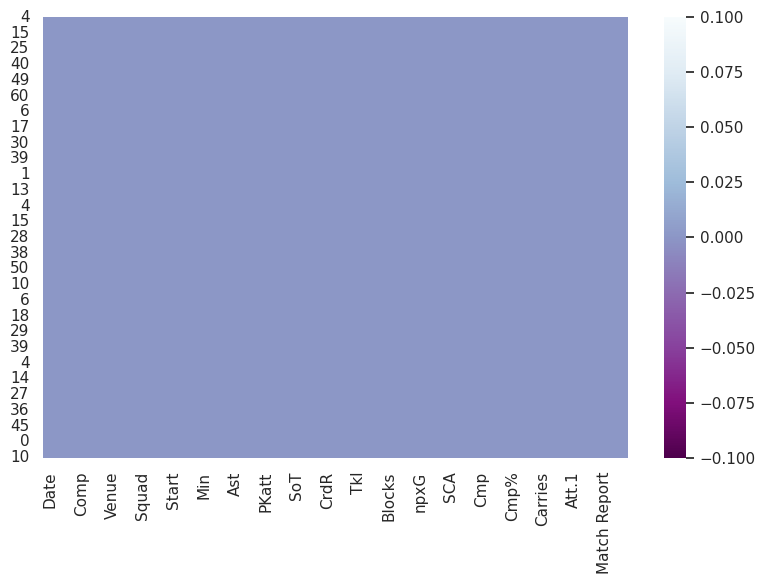

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_cc.isnull(), cmap='BuPu_r', ax=ax)
plt.tight_layout()
plt.show()

In [21]:
df_cc['Squad'].unique()

array(['Manchester Utd'], dtype=object)

### EDA

In [ ]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 4 to 10
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          253 non-null    object 
 1   Day           253 non-null    object 
 2   Comp          253 non-null    object 
 3   Round         253 non-null    object 
 4   Venue         253 non-null    object 
 5   Result        253 non-null    object 
 6   Squad         253 non-null    object 
 7   Opponent      253 non-null    object 
 8   Start         253 non-null    object 
 9   Pos           253 non-null    object 
 10  Min           253 non-null    float64
 11  Gls           253 non-null    float64
 12  Ast           253 non-null    float64
 13  PK            253 non-null    float64
 14  PKatt         253 non-null    float64
 15  Sh            253 non-null    float64
 16  SoT           253 non-null    float64
 17  CrdY          253 non-null    float64
 18  CrdR          253 non-null    f

In [22]:
df_cc.describe().round(2)

Min     Gls     Ast      PK   PKatt      Sh     SoT    CrdY    CrdR  \
count  253.00  253.00  253.00  253.00  253.00  253.00  253.00  253.00  253.00   
mean    62.09    0.12    0.13    0.01    0.01    1.29    0.43    0.19    0.01   
std     32.21    0.36    0.35    0.09    0.09    1.38    0.70    0.39    0.09   
min      1.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%     30.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
50%     79.00    0.00    0.00    0.00    0.00    1.00    0.00    0.00    0.00   
75%     90.00    0.00    0.00    0.00    0.00    2.00    1.00    0.00    0.00   
max    120.00    2.00    2.00    1.00    1.00    7.00    4.00    1.00    1.00   

       Touches  ...     SCA     GCA     Cmp     Att   Cmp%    PrgP  Carries  \
count   253.00  ...  253.00  253.00  253.00  253.00  253.0  253.00   253.00   
mean     46.16  ...    2.51    0.26   29.37   37.90   76.5    4.13    25.89   
std      27.33  ...    2.58    0.51   19.44   24.13   12.4    3.53    17.13   
min       0.00  ...    0.00    0.00    0.00    0.00    0.0    0.00     0.00   
25%      24.00  ...    1.00    0.00   14.00   19.00   71.0    2.00    12.00   
50%      46.00  ...    2.00    0.00   28.00   35.00   78.0    3.00    24.00   
75%      67.00  ...    4.00    0.00   43.00   56.00   83.0    6.00    38.00   
max     129.00  ...   13.00    2.00  108.00  122.00  100.0   23.00    98.00   

         PrgC   Att.1    Succ  
count  253.00  253.00  253.00  
mean     0.96    0.92    0.39  
std      1.44    1.22    0.67  
min      0.00    0.00    0.00  
25%      0.00    0.00    0.00  
50%      0.00    1.00    0.00  
75%      1.00    1.00    1.00  
max      9.00    6.00    4.00  

[8 rows x 26 columns]

<ipython-input-23-838198834c87>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcorall=df_cc.corr()


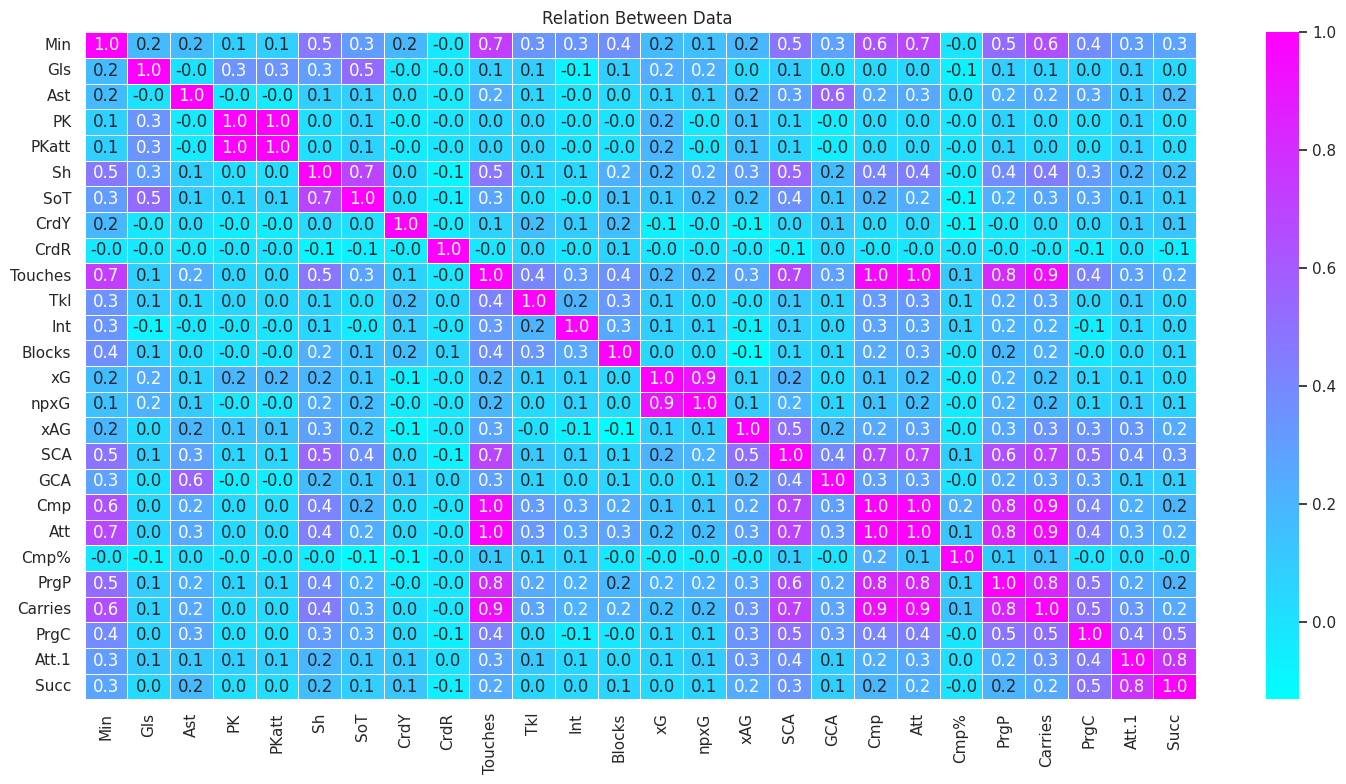

In [23]:
dcorall=df_cc.corr()                                      
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(dcorall, cmap='cool', annot=True, linewidths=0.5, ax=ax, fmt='.1f')
ax.set_title('Relation Between Data ')
plt.tight_layout()
plt.show()

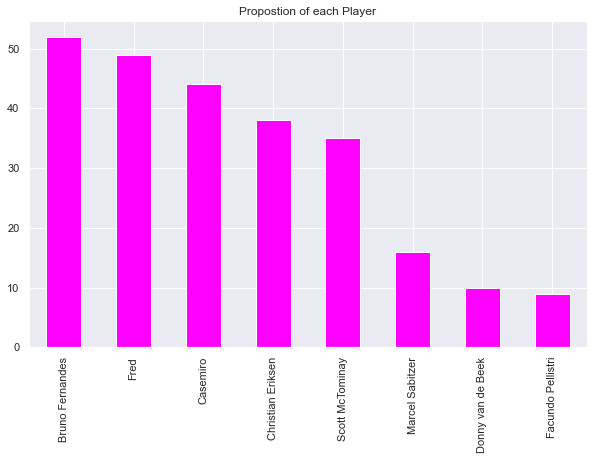

In [ ]:
plt.figure(figsize=(10, 6))
df_cc.Player.value_counts().plot(kind='bar', color='magenta')
plt.title('Propostion of each Player')
plt.show()

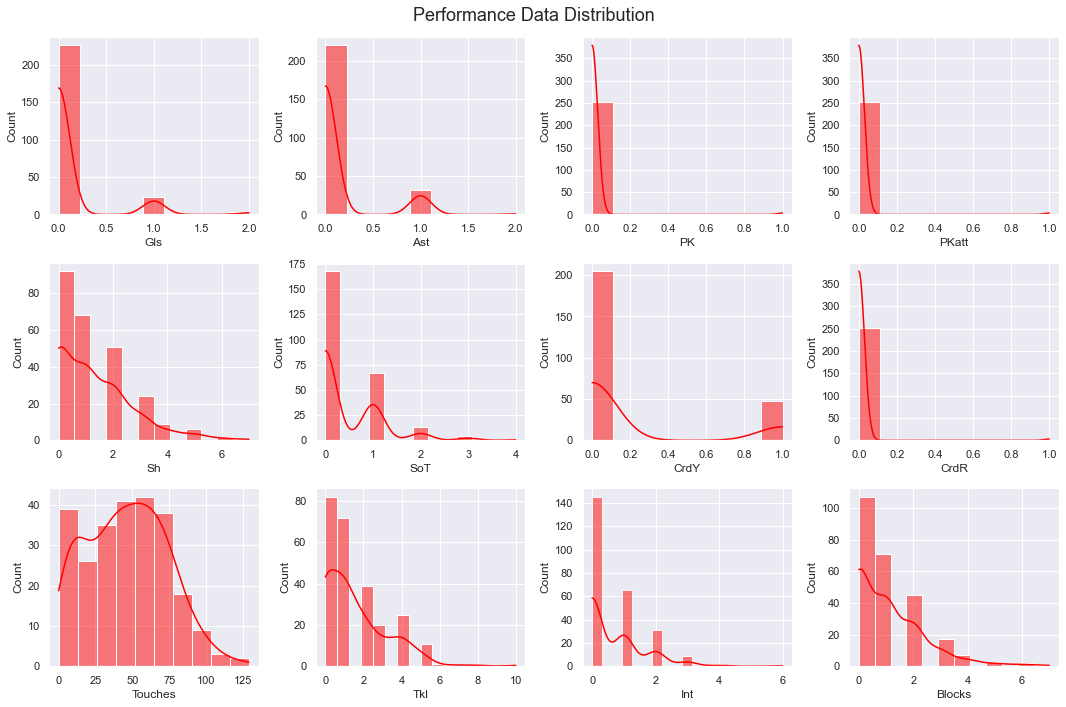

In [ ]:
performance = df_cc.loc[:,['Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY',
       'CrdR', 'Touches', 'Tkl', 'Int', 'Blocks']]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, column in enumerate(performance.columns):
    row = i // 4
    col = i % 4
    sns.histplot(performance[column], ax=axes[row, col], kde=True, color='red');
    
fig.suptitle("Performance Data Distribution", fontsize=18)   
plt.tight_layout()

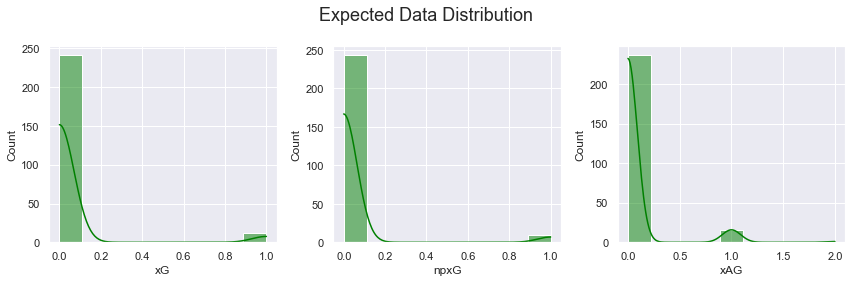

In [ ]:
expected = df_cc.loc[:,['xG', 'npxG', 'xAG']]
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
for i, column in enumerate(expected.columns):
    ax = axes[i]
    sns.histplot(expected[column], ax=ax, kde=True, color='green');
    
fig.suptitle("Expected Data Distribution", fontsize=18)  
plt.tight_layout()
plt.show()

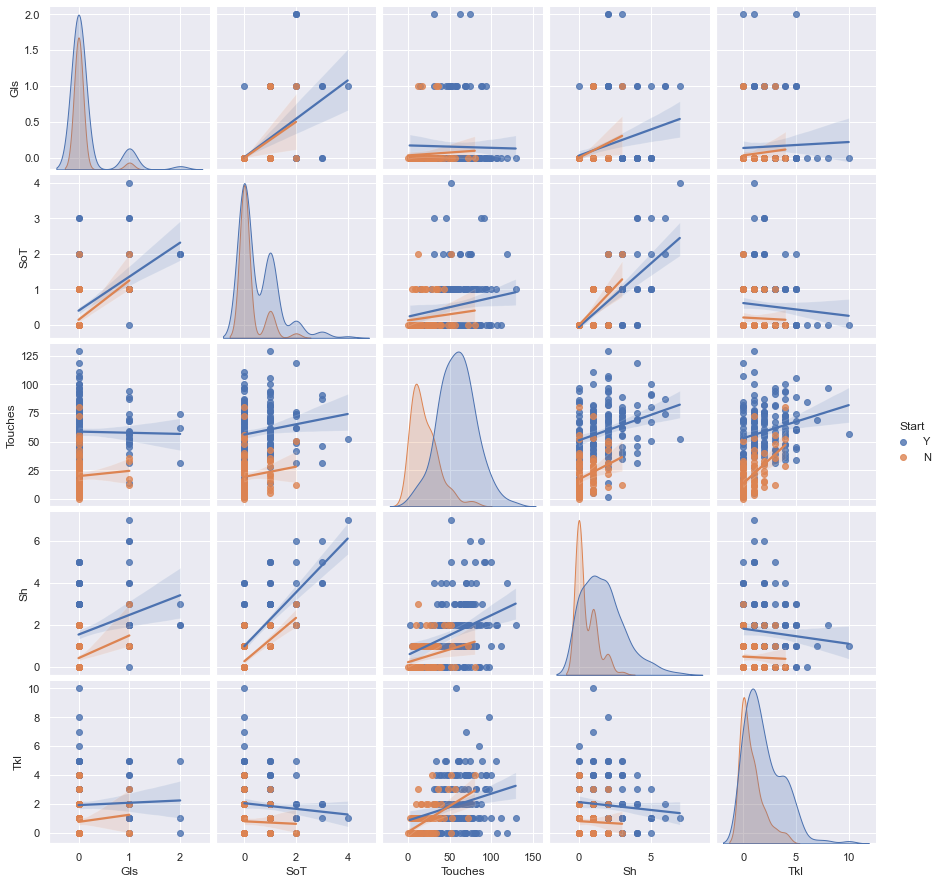

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='Dataset has 0 variance; skipping density estimate.')
sns.pairplot(df_cc, vars=['Gls','SoT', 'Touches', 'Sh', 'Tkl'], hue='Start', markers = 'o' ,kind='reg');

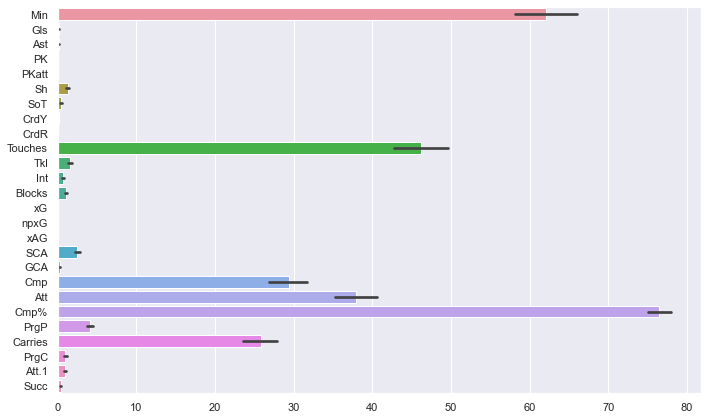

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cc, orient='h')
plt.tight_layout()

<Figure size 720x504 with 0 Axes>

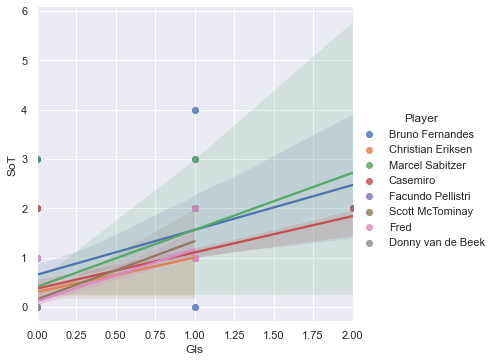

In [ ]:
plt.figure(figsize=(10, 7))
sns.lmplot(x='Gls', y='SoT', data=df_cc, hue='Player')
# plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

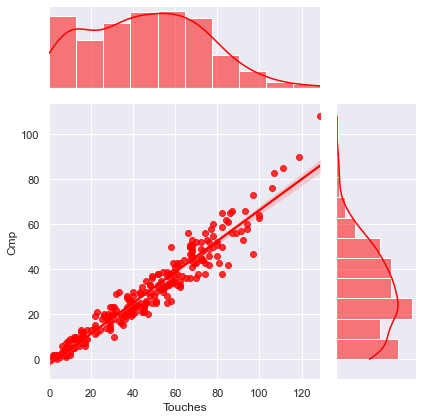

In [ ]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Touches',y='Cmp',data=df_cc,kind='reg',ratio=3, color='red')
plt.show()

### Preparing Data

In [24]:
df_cc.head()

Date  Day            Comp        Round Venue Result           Squad  \
4  2022-08-07  Sun  Premier League  Matchweek 1  Home  L 1–2  Manchester Utd   
5  2022-08-13  Sat  Premier League  Matchweek 2  Away  L 0–4  Manchester Utd   
6  2022-08-22  Mon  Premier League  Matchweek 3  Home  W 2–1  Manchester Utd   
7  2022-08-27  Sat  Premier League  Matchweek 4  Away  W 1–0  Manchester Utd   
8  2022-09-01  Thu  Premier League  Matchweek 5  Away  W 1–0  Manchester Utd   

         Opponent Start   Pos  ...   Cmp   Att  Cmp%  PrgP  Carries  PrgC  \
4        Brighton     Y    LM  ...  55.0  72.0  76.0  16.0     46.0   6.0   
5       Brentford     Y    AM  ...  47.0  57.0  82.0   7.0     35.0   1.0   
6       Liverpool     Y  AMRW  ...  26.0  40.0  65.0   6.0     28.0   2.0   
7     Southampton     Y  AMRW  ...  26.0  40.0  65.0   7.0     27.0   2.0   
8  Leicester City     Y  AMRW  ...  44.0  62.0  71.0  12.0     43.0   5.0   

   Att.1  Succ  Match Report           Player  
4    3.0   2.0  Match Report  Bruno Fernandes  
5    0.0   0.0  Match Report  Bruno Fernandes  
6    1.0   0.0  Match Report  Bruno Fernandes  
7    1.0   1.0  Match Report  Bruno Fernandes  
8    4.0   1.0  Match Report  Bruno Fernandes  

[5 rows x 38 columns]

In [25]:
df_train = df_cc.iloc[:, [8] + list(range(11, 35))]
df_train['Start'] = df_train['Start'].apply(lambda x: 1 if x == 'Y' else 0)
start_column = df_train.pop('Start')
df_train.insert(24, 'Start', start_column)
df_train.head()

<ipython-input-25-70deaf5e3413>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Start'] = df_train['Start'].apply(lambda x: 1 if x == 'Y' else 0)


Gls  Ast   PK  PKatt   Sh  SoT  CrdY  CrdR  Touches  Tkl  ...  SCA  GCA  \
4  0.0  0.0  0.0    0.0  1.0  0.0   0.0   0.0     78.0  0.0  ...  4.0  0.0   
5  0.0  0.0  0.0    0.0  3.0  0.0   1.0   0.0     67.0  2.0  ...  1.0  0.0   
6  0.0  0.0  0.0    0.0  1.0  1.0   1.0   0.0     58.0  3.0  ...  4.0  0.0   
7  1.0  0.0  0.0    0.0  5.0  2.0   0.0   0.0     51.0  1.0  ...  3.0  0.0   
8  0.0  0.0  0.0    0.0  0.0  0.0   0.0   0.0     72.0  3.0  ...  4.0  0.0   

    Cmp   Att  Cmp%  PrgP  Carries  PrgC  Att.1  Start  
4  55.0  72.0  76.0  16.0     46.0   6.0    3.0      1  
5  47.0  57.0  82.0   7.0     35.0   1.0    0.0      1  
6  26.0  40.0  65.0   6.0     28.0   2.0    1.0      1  
7  26.0  40.0  65.0   7.0     27.0   2.0    1.0      1  
8  44.0  62.0  71.0  12.0     43.0   5.0    4.0      1  

[5 rows x 25 columns]

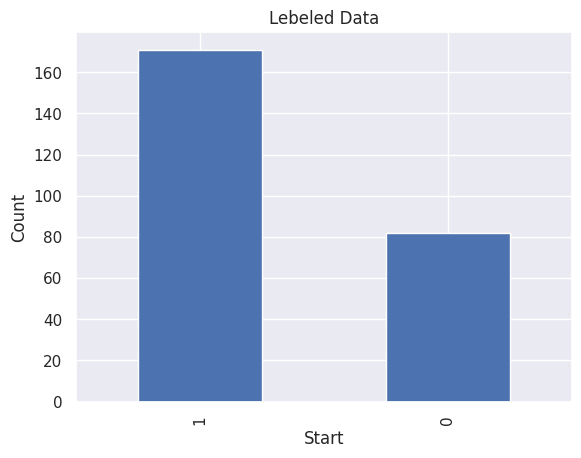

In [26]:
df_train['Start'].value_counts().plot(kind='bar')
plt.xlabel('Start')
plt.ylabel('Count')
plt.title('Lebeled Data')
plt.show()

In [ ]:
df_train.columns

Index(['Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches',
       'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp', 'Att',
       'Cmp%', 'PrgP', 'Carries', 'PrgC', 'Att.1', 'Start'],
      dtype='object')

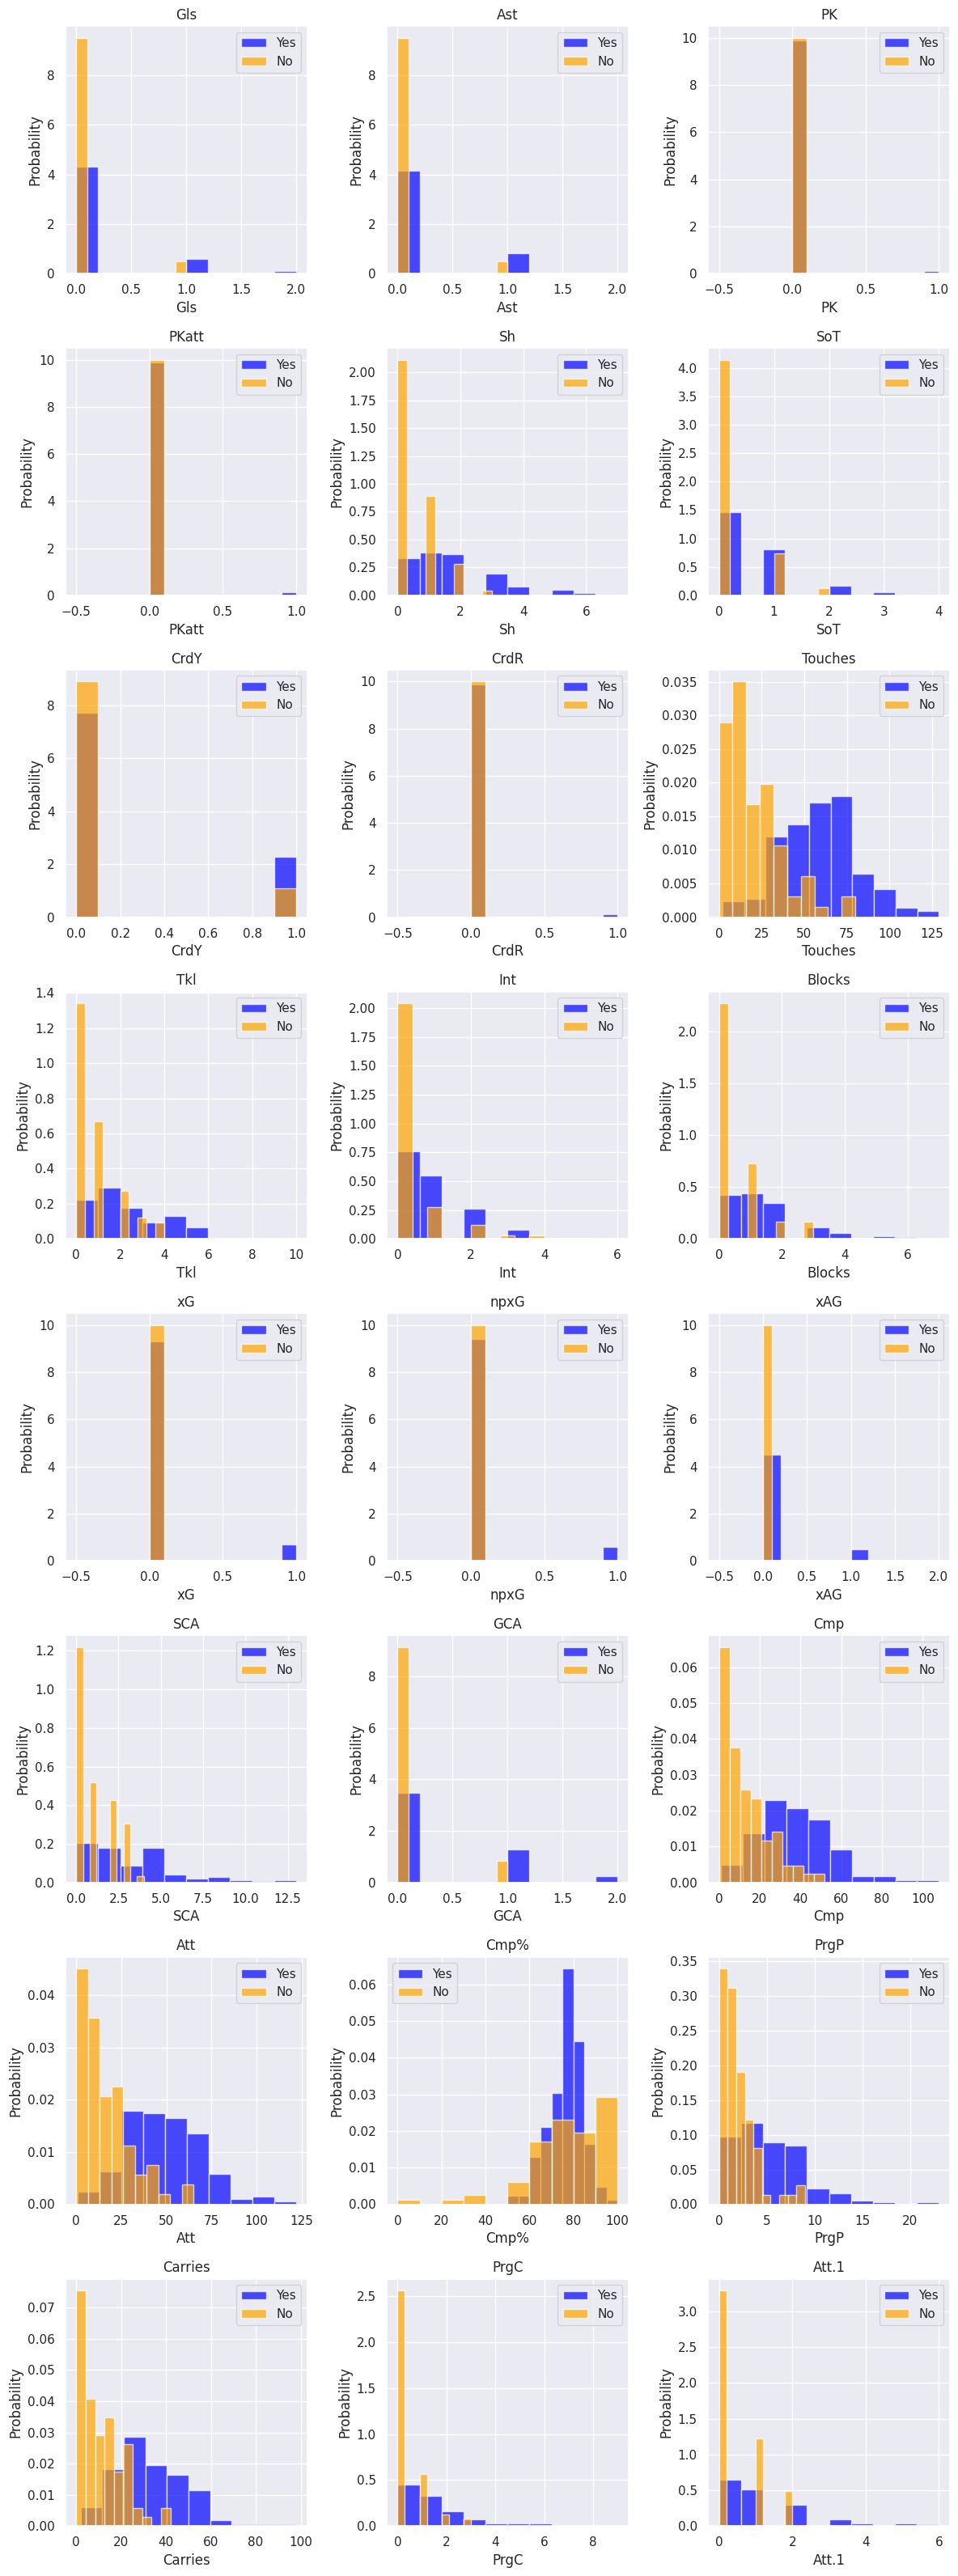

In [27]:
num_columns = len(df_train.columns)-1
num_rows = (num_columns + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows*4))

for i, label in enumerate(df_train.columns[:-1]):
    ax = axes[i // 3, i % 3]

    ax.hist(df_train[df_train["Start"]==1][label], color='blue', label='Yes', alpha=0.7, density=True)
    ax.hist(df_train[df_train["Start"]==0][label], color='orange', label='No', alpha=0.7, density=True)
    
    ax.set_title(label)
    ax.set_ylabel('Probability')
    ax.set_xlabel(label)
    ax.legend()

if num_columns % 3 != 0:
    for j in range(num_columns % 3, 3):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

In [ ]:
# X = df_train.drop(["Start"],axis=1)
# # y = df_train["Start"]

In [ ]:
# X

In [ ]:
# y

Target Output
1    171
0     82
Name: Start, dtype: int64


## Train, Validation, Test Dataset

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from imblearn.over_sampling import RandomOverSampler

In [30]:
train, valid, test = np.split(df_train.sample(frac=1), [int(0.6*len(df_train)), int(0.8*len(df_train))])

In [31]:
def scale(df, oversample=False):
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values
  
  mms = MinMaxScaler()
  X = mms.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [32]:
train, X_train, y_train = scale(train, oversample=True)
valid, X_val, y_val = scale(valid, oversample=False)
test, X_test, y_test = scale(test, oversample=False)

In [34]:
print(f"Total feature matrix {X_train.shape[1]}, Total of data {X_train.shape[0]}")

Total feature matrix 24, Total of data 208


In [42]:
print("Target Output")
print(f"YES: {sum(y_train==1)}")
print(f"NO: {sum(y_train==0)}")

Target Output
YES: 104
NO: 104


In [71]:
X_train.shape

(208, 24)

### Modelling

In [38]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# k_fold = KFold(n_splits = 5, shuffle=True, random_state = 0)

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

In [46]:
def plot_learning_curve(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy'
    )
    
    # Calculate mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
    plt.fill_between(
        train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
        alpha=0.1, color='blue'
    )
    plt.plot(train_sizes, validation_scores_mean, label='Validation Score', color='orange')
    plt.fill_between(
        train_sizes, validation_scores_mean - validation_scores_std,
        validation_scores_mean + validation_scores_std, alpha=0.1, color='orange'
    )
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

In [47]:
accuracy_train=[]
accuracy_val=[]
accuracy_cross=[]

def data_model(model, k=5):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Training Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    accuracy_train.append(train_accuracy)
    accuracy_val.append(val_accuracy)

    scores = cross_val_score(model, X_train, y_train, cv=k)
    print("Cross-Validation Scores:", scores)
    print("Average Cross-Validation Score:", np.mean(scores))
    accuracy_cross.append(np.mean(scores))

    train_sizes = np.linspace(0.1, 1.0, 10)  
    plot_learning_curve(model, X_train, y_train, train_sizes, cv=k)

In [48]:
Algorithm=['LogisticRegression','GradientBoostingClassifier','KNeighborsClassifier','RandomForestClassifier',
           'DecisionTreeClassifie',
          'GaussianNB','SVC']

Training Accuracy: 0.8125
Validation Accuracy: 0.8431372549019608
Cross-Validation Scores: [0.80952381 0.88095238 0.83333333 0.70731707 0.7804878 ]
Average Cross-Validation Score: 0.8023228803716608


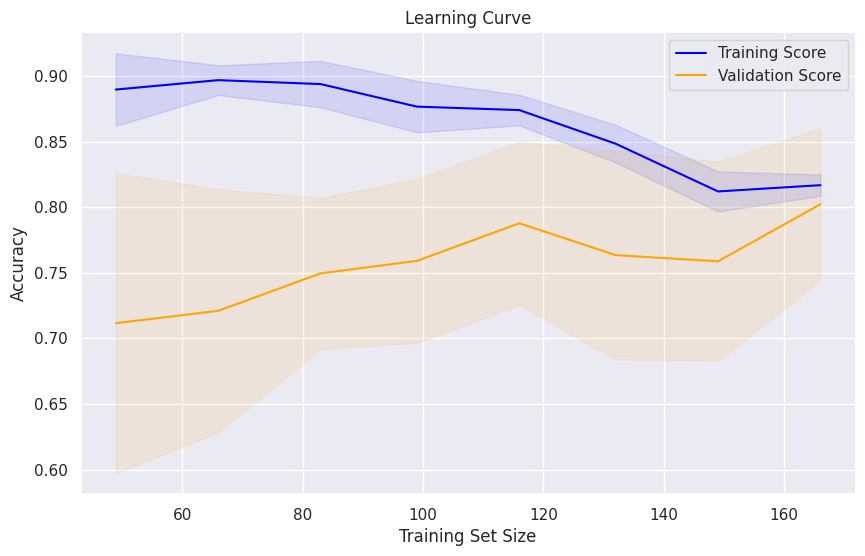

In [49]:
# Logistic_model=LogisticRegression(penalty='l2', C=1.0)
Logistic_model=LogisticRegression()
data_model(Logistic_model)

Training Accuracy: 1.0
Validation Accuracy: 0.803921568627451
Cross-Validation Scores: [0.95238095 0.92857143 0.92857143 0.92682927 0.92682927]
Average Cross-Validation Score: 0.932636469221835


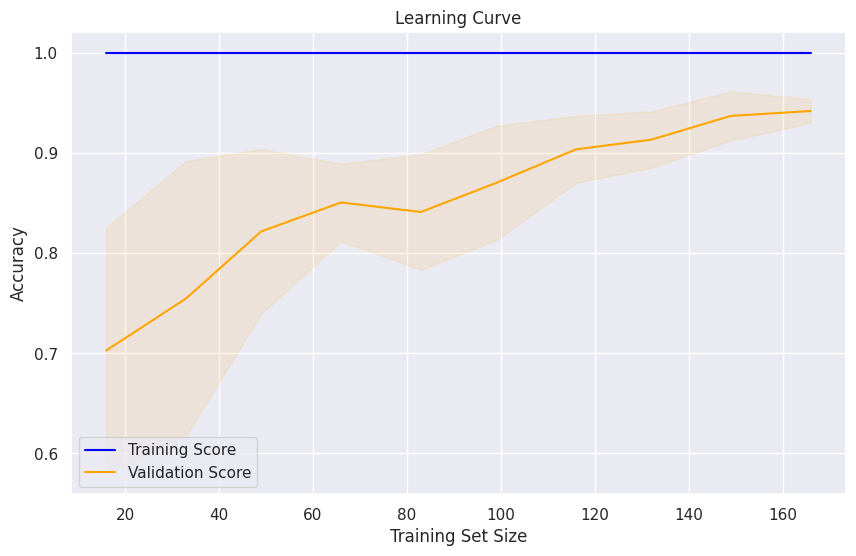

In [50]:
# RFC_model=RandomForestClassifier(n_estimators=200,max_depth=10,max_features=0.5,min_samples_leaf=5)
RFC_model=RandomForestClassifier()
data_model(RFC_model)

Training Accuracy: 1.0
Validation Accuracy: 0.7450980392156863
Cross-Validation Scores: [0.95238095 0.9047619  0.92857143 0.90243902 0.92682927]
Average Cross-Validation Score: 0.9229965156794424


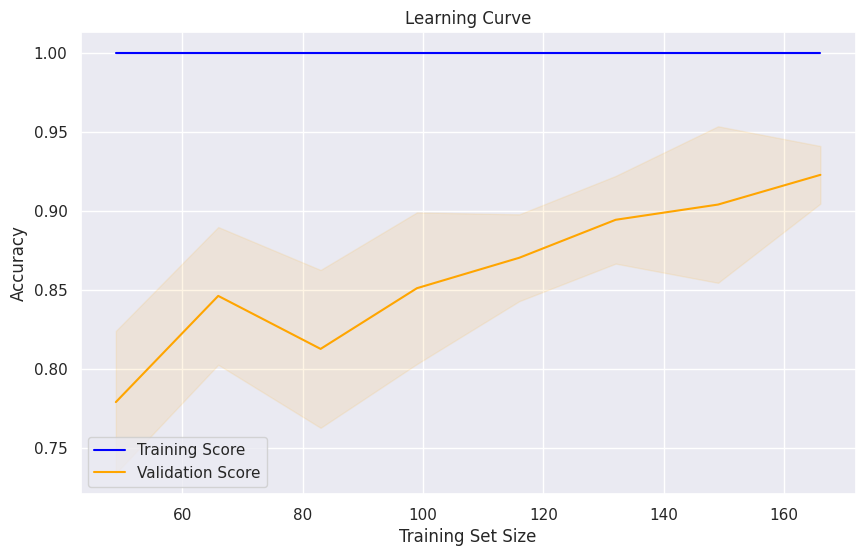

In [51]:
# GBC_model=GradientBoostingClassifier(learning_rate=0.05,max_depth=5,min_samples_leaf=10)
GBC_model=GradientBoostingClassifier()
data_model(GBC_model)

Training Accuracy: 1.0
Validation Accuracy: 0.803921568627451
Cross-Validation Scores: [0.88095238 0.73809524 0.83333333 0.92682927 0.85365854]
Average Cross-Validation Score: 0.8465737514518002


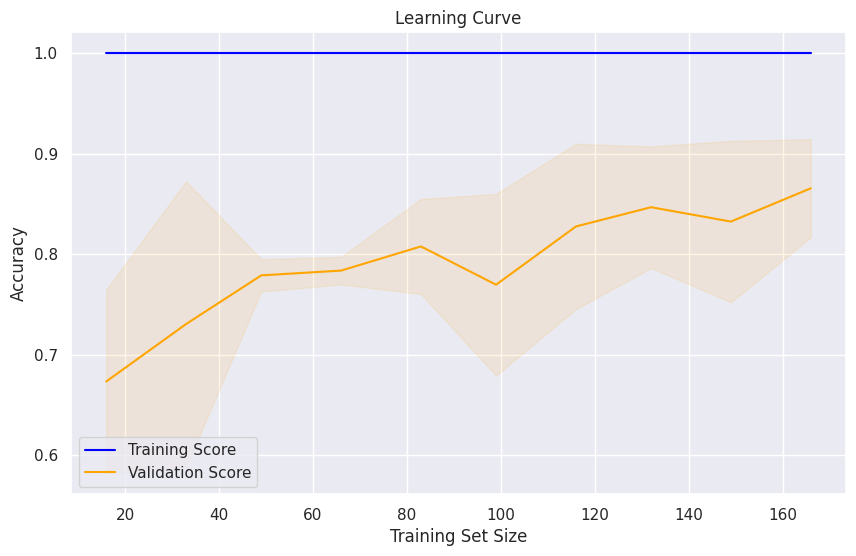

In [52]:
# DTC_model=DecisionTreeClassifier(min_samples_leaf=10,max_depth=5,min_impurity_decrease=0.01)
DTC_model=DecisionTreeClassifier()
data_model(DTC_model)

Training Accuracy: 0.8365384615384616
Validation Accuracy: 0.7647058823529411
Cross-Validation Scores: [0.78571429 0.69047619 0.83333333 0.75609756 0.73170732]
Average Cross-Validation Score: 0.7594657375145181


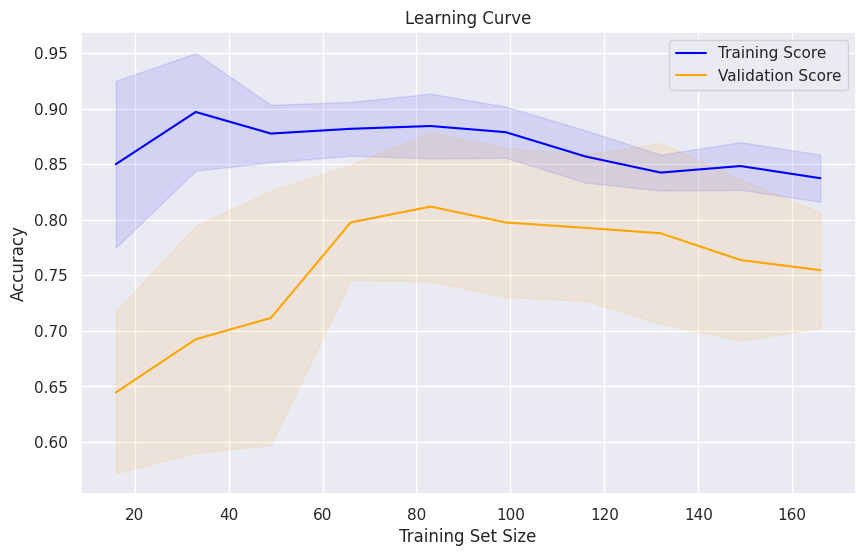

In [53]:
KNC_model=KNeighborsClassifier()
data_model(KNC_model)

Training Accuracy: 0.6153846153846154
Validation Accuracy: 0.6078431372549019
Cross-Validation Scores: [0.69047619 0.57142857 0.61904762 0.58536585 0.6097561 ]
Average Cross-Validation Score: 0.6152148664343786


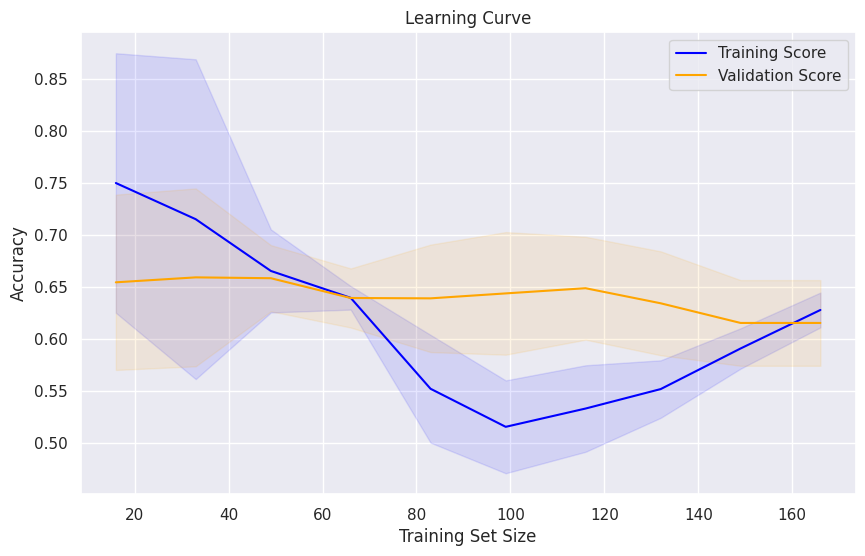

In [54]:
GNB_model=GaussianNB()
data_model(GNB_model)

Training Accuracy: 0.8557692307692307
Validation Accuracy: 0.8431372549019608
Cross-Validation Scores: [0.78571429 0.85714286 0.83333333 0.73170732 0.73170732]
Average Cross-Validation Score: 0.7879210220673635


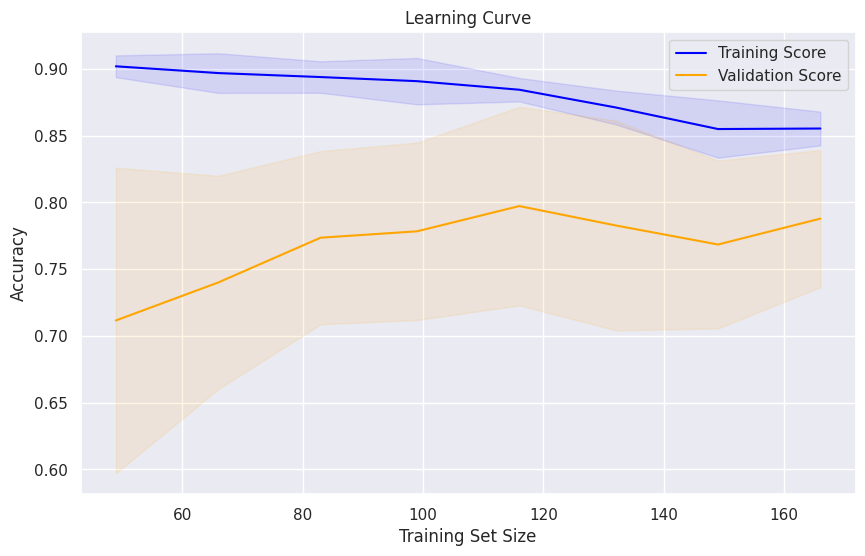

In [55]:
SVC_model=SVC()
data_model(SVC_model)

In [56]:
new=pd.DataFrame({'Algorithm':Algorithm,'Training Accuracy':accuracy_train,'Validation':accuracy_val,
                  'Average Cross-Validation Score':accuracy_cross})

In [57]:
new

Algorithm  Training Accuracy  Validation  \
0          LogisticRegression           0.812500    0.843137   
1  GradientBoostingClassifier           1.000000    0.803922   
2        KNeighborsClassifier           1.000000    0.745098   
3      RandomForestClassifier           1.000000    0.803922   
4       DecisionTreeClassifie           0.836538    0.764706   
5                  GaussianNB           0.615385    0.607843   
6                         SVC           0.855769    0.843137   

   Average Cross-Validation Score  
0                        0.802323  
1                        0.932636  
2                        0.922997  
3                        0.846574  
4                        0.759466  
5                        0.615215  
6                        0.787921

In [ ]:
# num_examples = np.arange(1, len(new) + 1)

# # Plotting the learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(num_examples, new['Training Accuracy'], label='Training Accuracy')
# plt.plot(num_examples, new['Validation'], label='Validation Accuracy')
# plt.xlabel('Number of Training Examples')
# plt.ylabel('Accuracy')
# plt.title('Learning Curve')
# plt.legend()
# plt.show()

## Fine Tuning


In [58]:
#Logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceba

In [59]:
best_logistic_model = LogisticRegression(**best_params)
best_logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [60]:
log_predict = best_logistic_model.predict(X_test)

In [61]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.82      0.97      0.89        32

    accuracy                           0.84        51
   macro avg       0.87      0.80      0.82        51
weighted avg       0.86      0.84      0.84        51



In [62]:
#KNN
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [63]:
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

In [64]:
KNN_predict = best_knn_model.predict(X_test)

In [65]:
print(classification_report(y_test, KNN_predict))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.76      0.81      0.79        32

    accuracy                           0.73        51
   macro avg       0.71      0.70      0.70        51
weighted avg       0.72      0.73      0.72        51



In [67]:
#SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
SVC_model=SVC()
grid_search = GridSearchCV(SVC_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [68]:
best_svc_model = SVC(**best_params)
best_svc_model.fit(X_train, y_train)

SVC(C=10)

In [69]:
SVC_predict = best_svc_model.predict(X_test)

In [70]:
print(classification_report(y_test, SVC_predict))

              precision    recall  f1-score   support

           0       0.80      0.42      0.55        19
           1       0.73      0.94      0.82        32

    accuracy                           0.75        51
   macro avg       0.77      0.68      0.69        51
weighted avg       0.76      0.75      0.72        51



## Implement Neural Network with Tensorflow

In [72]:
import tensorflow as tf

In [73]:
# def plot_loss(history):
#   plt.plot(history.history['loss'], label='loss')
#   plt.plot(history.history['val_loss'], label='val_loss')
#   plt.xlabel('Epoch')
#   plt.ylabel('Binary crossentropy')
#   plt.legend()
#   plt.grid(True)
#   plt.show()

# def plot_accu(history):
#   plt.plot(history.history['accuracy'], label='accuracy')
#   plt.plot(history.history['val_accuracy'], label='val_accuracy')
#   plt.xlabel('Epoch')
#   plt.ylabel('Accuracy')
#   plt.legend()
#   plt.grid(True)
#   plt.show()

In [85]:
def plot_hist(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

In [95]:
def train_model(X_train, y_train, num_nodes, dropout, learning_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(24,)),
      tf.keras.layers.Dropout(dropout),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss="binary_crossentropy", 
                    metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
  
  return nn_model, history

In [76]:
# history = nn_model.fit(
#     X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
# )

Epoch 1/100
6/6 [==============================] - 2s 81ms/step - loss: 0.6944 - accuracy: 0.4940 - val_loss: 0.7363 - val_accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6578 - accuracy: 0.6084 - val_loss: 0.7937 - val_accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6324 - accuracy: 0.6265 - val_loss: 0.8482 - val_accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 40ms/step - loss: 0.6092 - accuracy: 0.6265 - val_loss: 0.8949 - val_accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.5896 - accuracy: 0.6265 - val_loss: 0.9312 - val_accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.5748 - accuracy: 0.6265 - val_loss: 0.9609 - val_accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 0.5614 - accuracy: 0.6265 - val_loss: 0.9881 - val_accuracy: 0.0

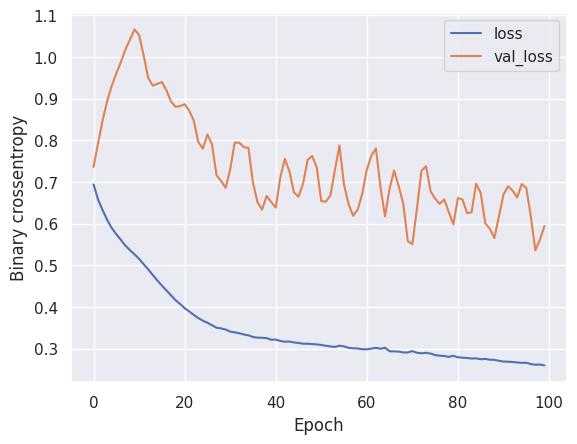

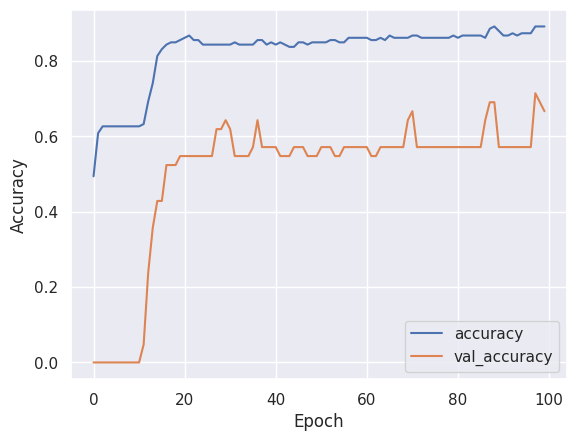

In [77]:
# plot_loss(history)
# plot_accu(history)

16 nodes, dropout: 0, learning_rate: 0.005, batch_size: 32


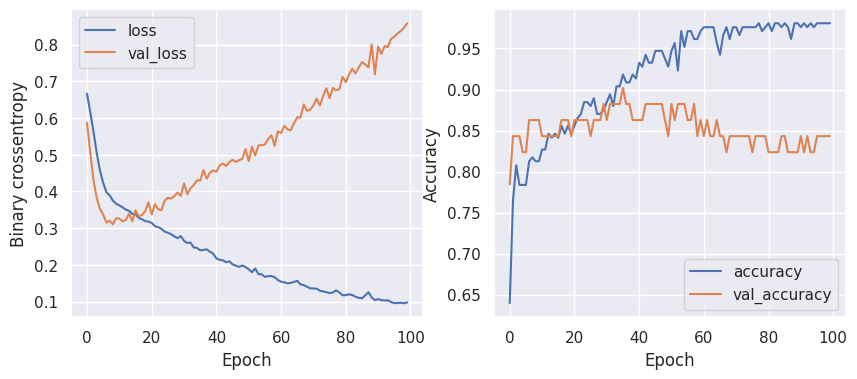

2/2 [==============================] - 0s 5ms/step - loss: 0.8586 - accuracy: 0.8431
Validation Loss: 0.8585554361343384
Validation Accuracy: 0.843137264251709
16 nodes, dropout: 0, learning_rate: 0.005, batch_size: 64


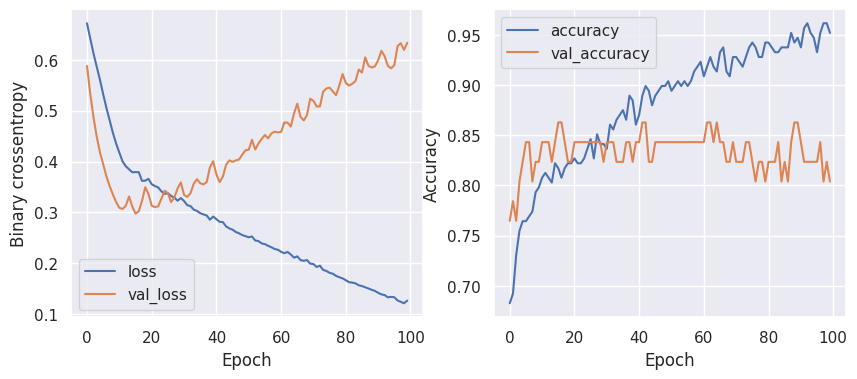

2/2 [==============================] - 0s 5ms/step - loss: 0.6338 - accuracy: 0.8039
Validation Loss: 0.6337649822235107
Validation Accuracy: 0.8039215803146362
16 nodes, dropout: 0, learning_rate: 0.005, batch_size: 128


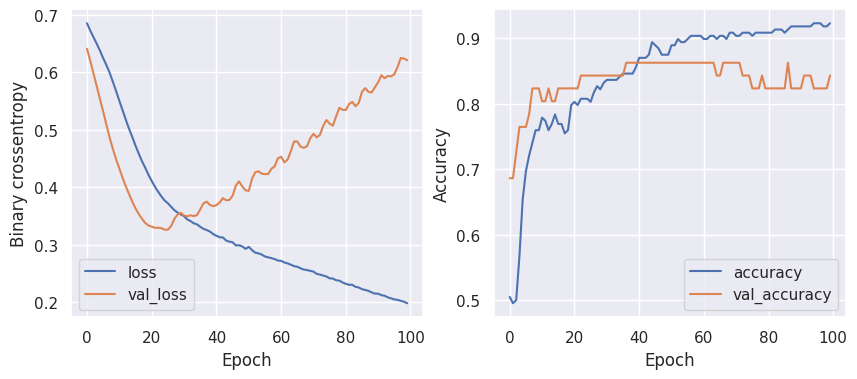

2/2 [==============================] - 0s 6ms/step - loss: 0.6213 - accuracy: 0.8431
Validation Loss: 0.6213053464889526
Validation Accuracy: 0.843137264251709
16 nodes, dropout: 0, learning_rate: 0.001, batch_size: 32


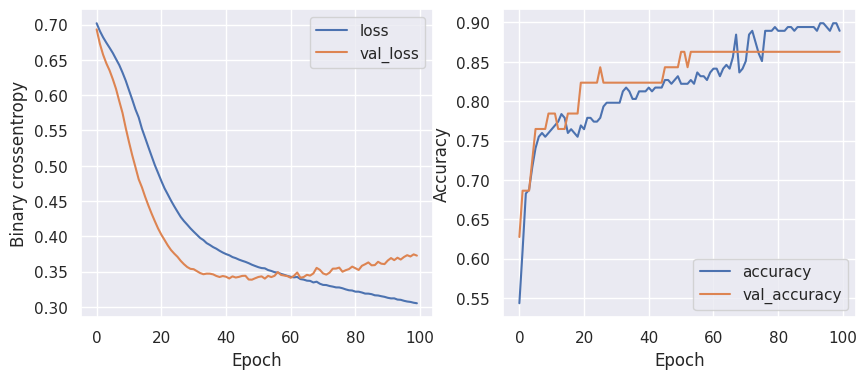

2/2 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.8627
Validation Loss: 0.3727671205997467
Validation Accuracy: 0.8627451062202454
16 nodes, dropout: 0, learning_rate: 0.001, batch_size: 64


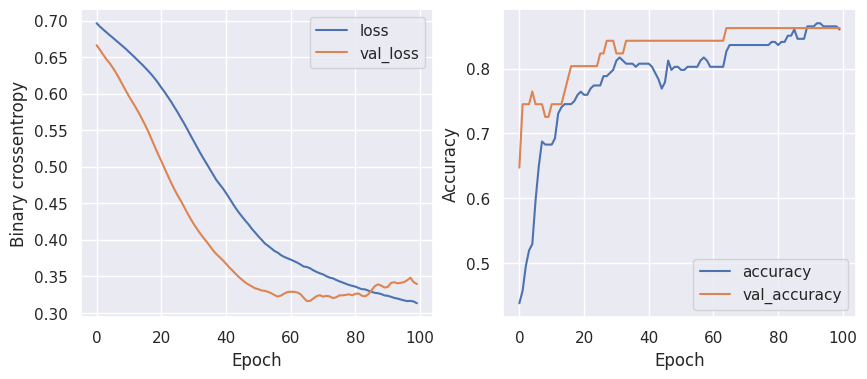

2/2 [==============================] - 0s 6ms/step - loss: 0.3395 - accuracy: 0.8627
Validation Loss: 0.33948197960853577
Validation Accuracy: 0.8627451062202454
16 nodes, dropout: 0, learning_rate: 0.001, batch_size: 128


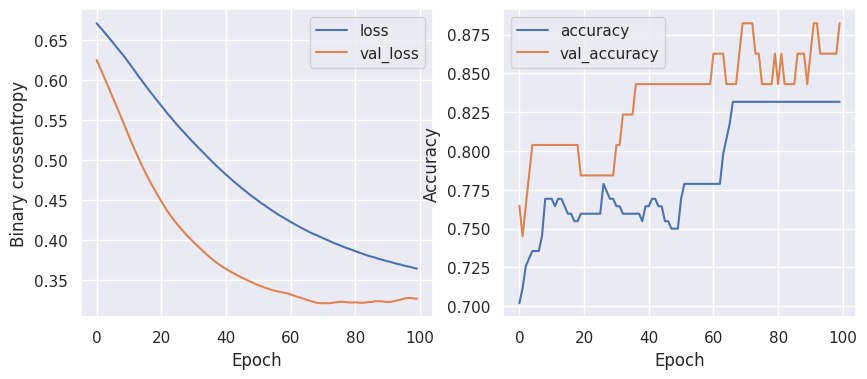

2/2 [==============================] - 0s 8ms/step - loss: 0.3265 - accuracy: 0.8824
Validation Loss: 0.3264561891555786
Validation Accuracy: 0.8823529481887817
16 nodes, dropout: 0, learning_rate: 0.01, batch_size: 32


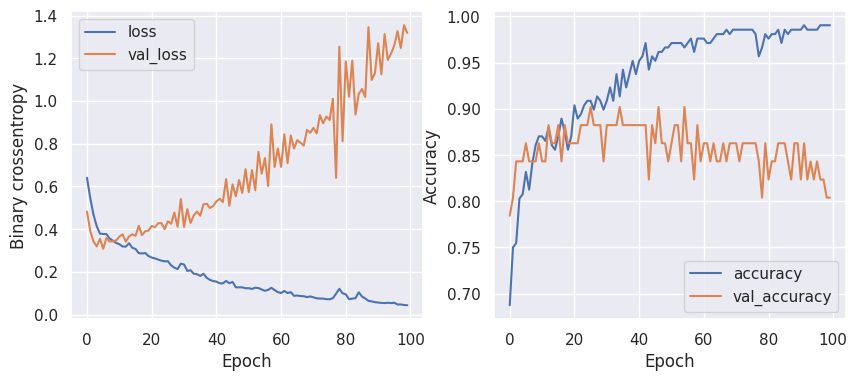

2/2 [==============================] - 0s 5ms/step - loss: 1.3184 - accuracy: 0.8039
Validation Loss: 1.3183996677398682
Validation Accuracy: 0.8039215803146362
16 nodes, dropout: 0, learning_rate: 0.01, batch_size: 64


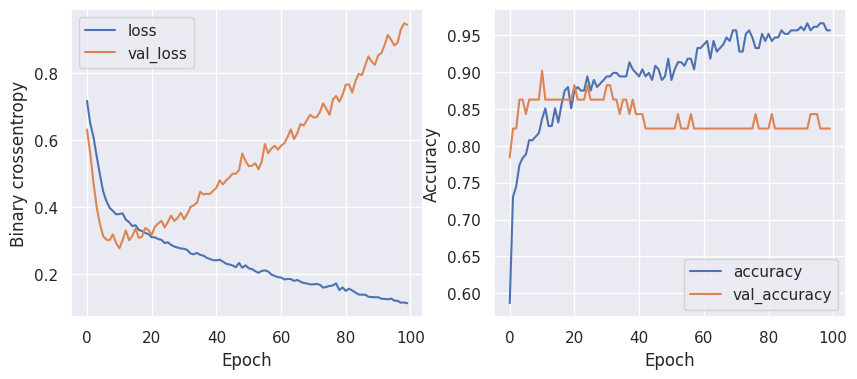

2/2 [==============================] - 0s 7ms/step - loss: 0.9450 - accuracy: 0.8235
Validation Loss: 0.9449909925460815
Validation Accuracy: 0.8235294222831726
16 nodes, dropout: 0, learning_rate: 0.01, batch_size: 128


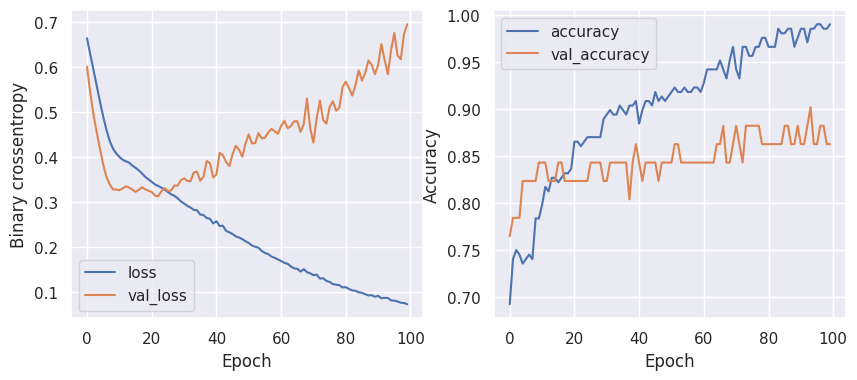

2/2 [==============================] - 0s 10ms/step - loss: 0.6947 - accuracy: 0.8627
Validation Loss: 0.6947188973426819
Validation Accuracy: 0.8627451062202454
16 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 32


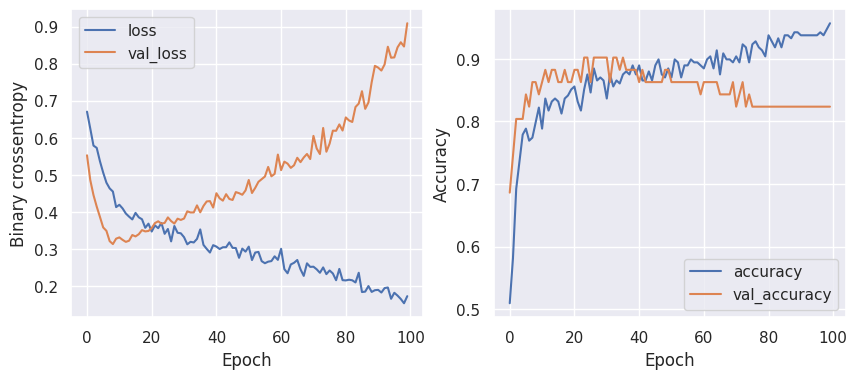

2/2 [==============================] - 0s 4ms/step - loss: 0.9089 - accuracy: 0.8235
Validation Loss: 0.9089152216911316
Validation Accuracy: 0.8235294222831726
16 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 64


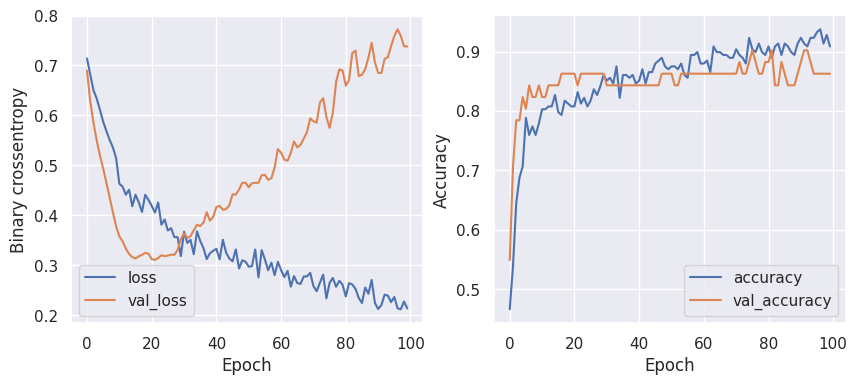

2/2 [==============================] - 0s 5ms/step - loss: 0.7377 - accuracy: 0.8627
Validation Loss: 0.7376918196678162
Validation Accuracy: 0.8627451062202454
16 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 128


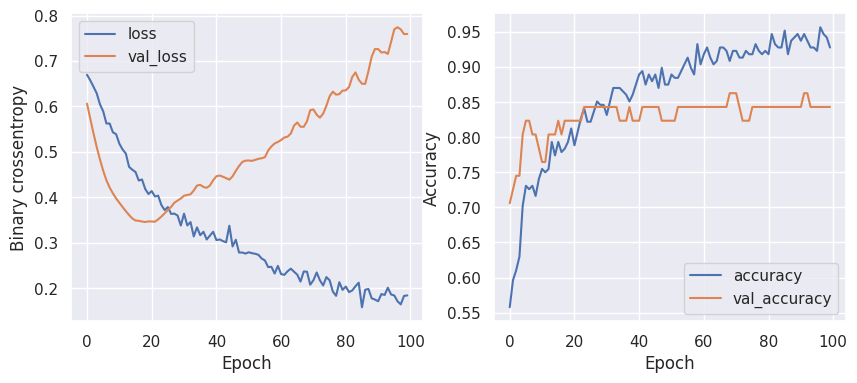

2/2 [==============================] - 0s 4ms/step - loss: 0.7595 - accuracy: 0.8431
Validation Loss: 0.759539008140564
Validation Accuracy: 0.843137264251709
16 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 32


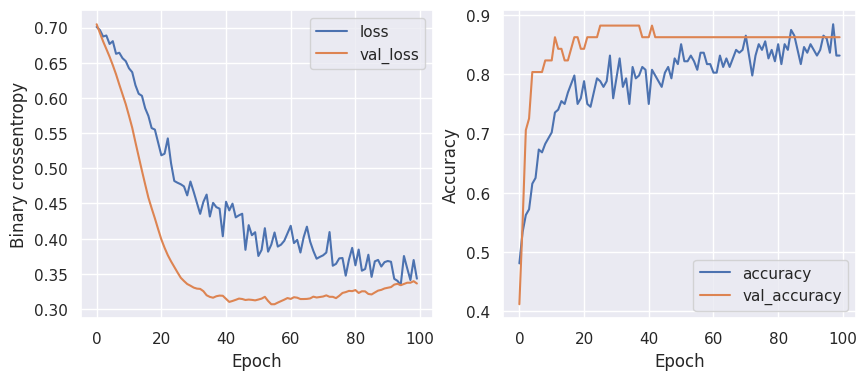

2/2 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.8627
Validation Loss: 0.3362720012664795
Validation Accuracy: 0.8627451062202454
16 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 64


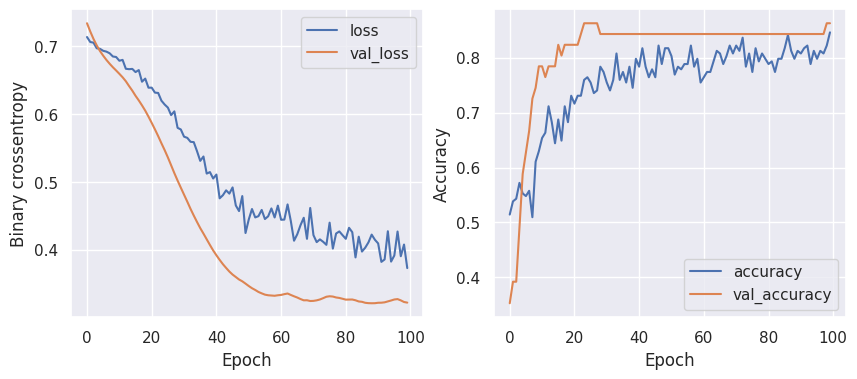

2/2 [==============================] - 0s 8ms/step - loss: 0.3222 - accuracy: 0.8627
Validation Loss: 0.3221818506717682
Validation Accuracy: 0.8627451062202454
16 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 128


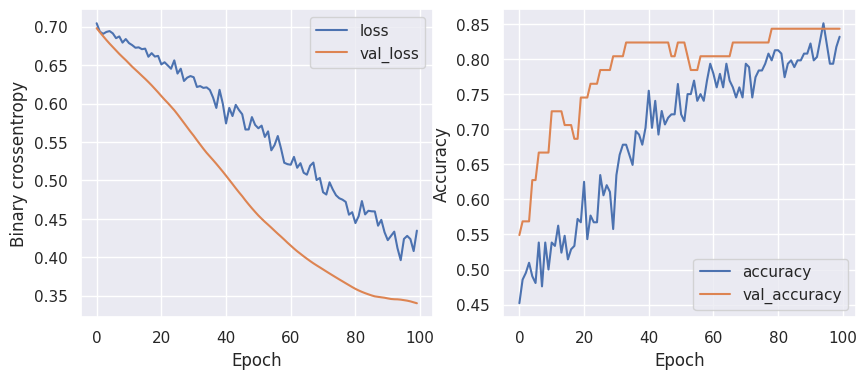

2/2 [==============================] - 0s 5ms/step - loss: 0.3402 - accuracy: 0.8431
Validation Loss: 0.34019985795021057
Validation Accuracy: 0.843137264251709
16 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 32


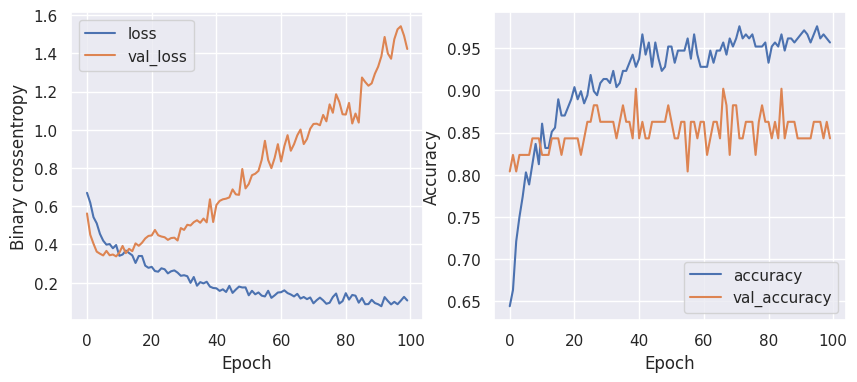

2/2 [==============================] - 0s 8ms/step - loss: 1.4228 - accuracy: 0.8431
Validation Loss: 1.4228414297103882
Validation Accuracy: 0.843137264251709
16 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 64


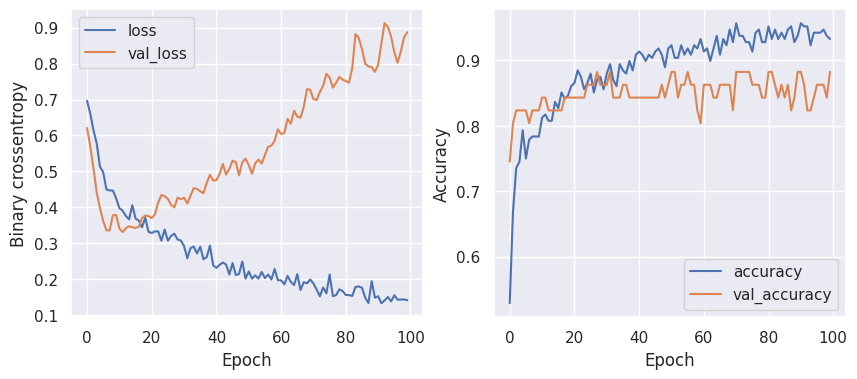

2/2 [==============================] - 0s 11ms/step - loss: 0.8875 - accuracy: 0.8824
Validation Loss: 0.8874742388725281
Validation Accuracy: 0.8823529481887817
16 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 128


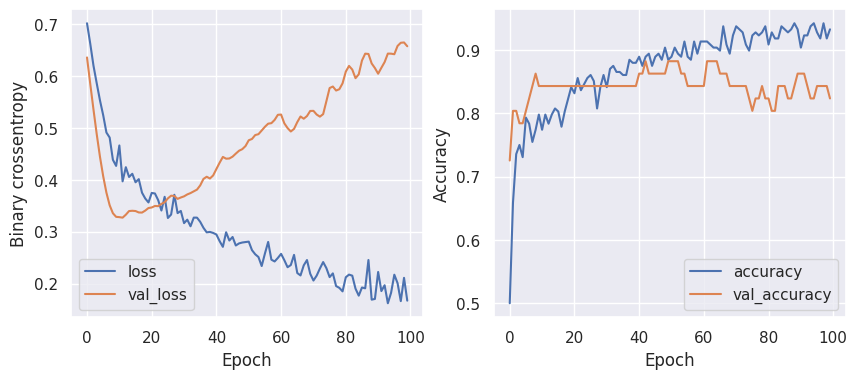

2/2 [==============================] - 0s 5ms/step - loss: 0.6573 - accuracy: 0.8235
Validation Loss: 0.6572755575180054
Validation Accuracy: 0.8235294222831726
32 nodes, dropout: 0, learning_rate: 0.005, batch_size: 32


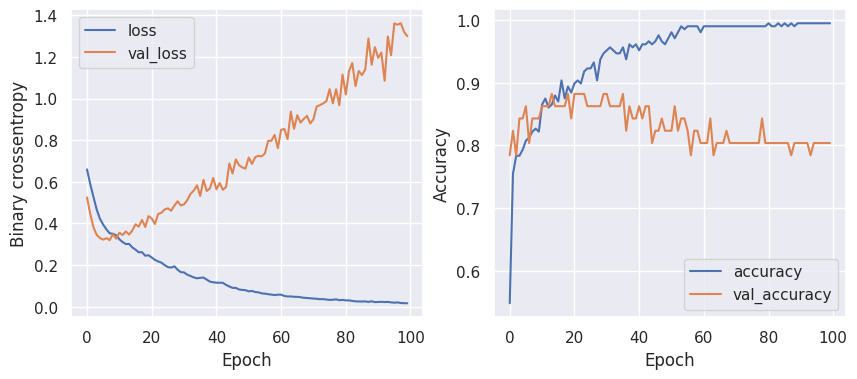

2/2 [==============================] - 0s 6ms/step - loss: 1.2994 - accuracy: 0.8039
Validation Loss: 1.2994303703308105
Validation Accuracy: 0.8039215803146362
32 nodes, dropout: 0, learning_rate: 0.005, batch_size: 64


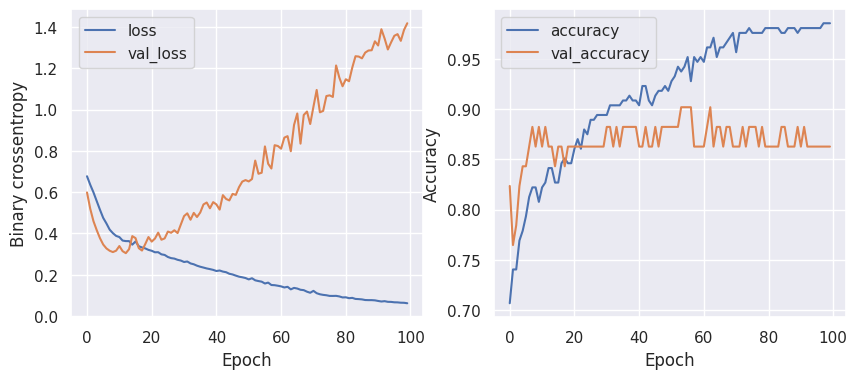

2/2 [==============================] - 0s 6ms/step - loss: 1.4181 - accuracy: 0.8627
Validation Loss: 1.418076753616333
Validation Accuracy: 0.8627451062202454
32 nodes, dropout: 0, learning_rate: 0.005, batch_size: 128


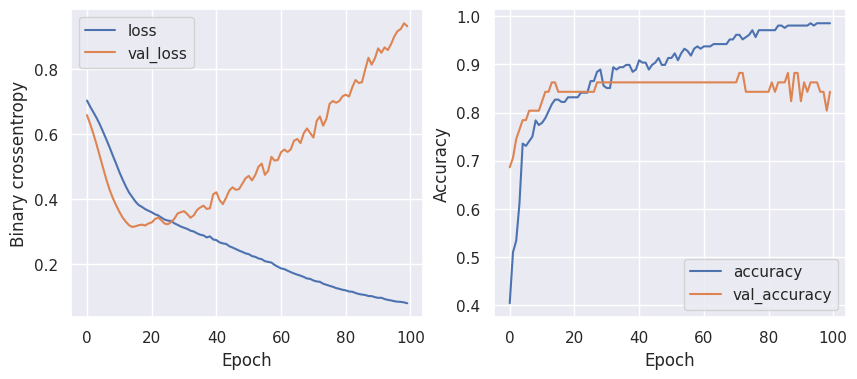

2/2 [==============================] - 0s 7ms/step - loss: 0.9311 - accuracy: 0.8431
Validation Loss: 0.9311395287513733
Validation Accuracy: 0.843137264251709
32 nodes, dropout: 0, learning_rate: 0.001, batch_size: 32


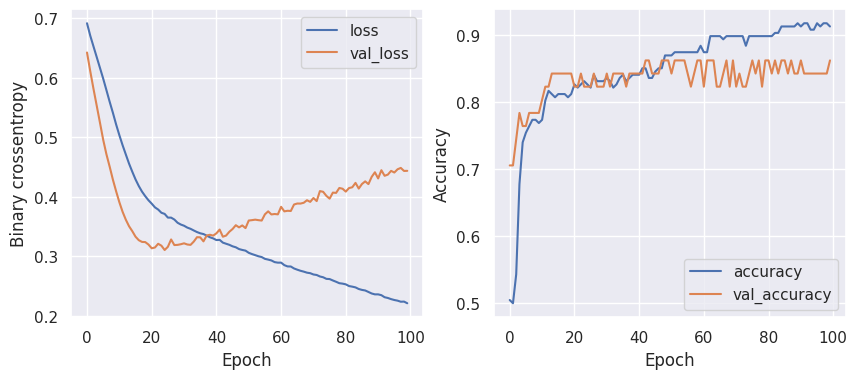

2/2 [==============================] - 0s 7ms/step - loss: 0.4438 - accuracy: 0.8627
Validation Loss: 0.443755567073822
Validation Accuracy: 0.8627451062202454
32 nodes, dropout: 0, learning_rate: 0.001, batch_size: 64


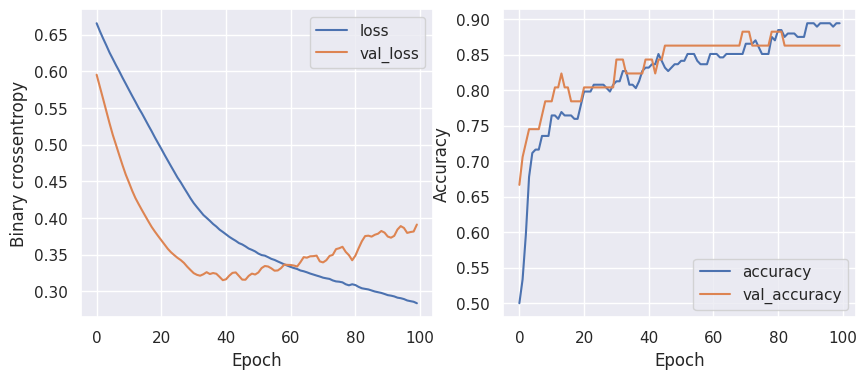

2/2 [==============================] - 0s 11ms/step - loss: 0.3911 - accuracy: 0.8627
Validation Loss: 0.3910713493824005
Validation Accuracy: 0.8627451062202454
32 nodes, dropout: 0, learning_rate: 0.001, batch_size: 128


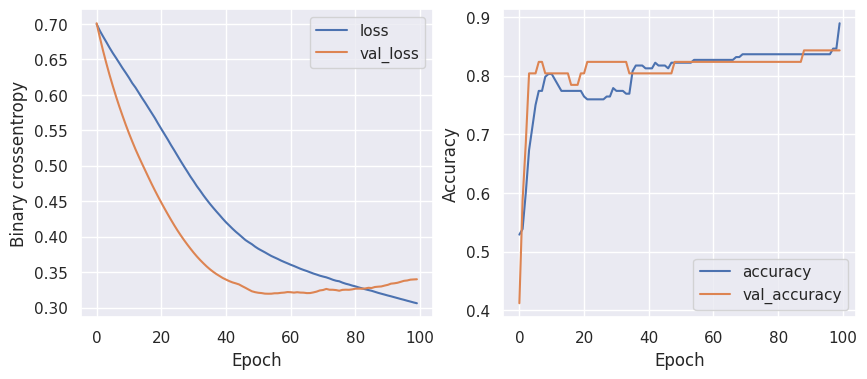

2/2 [==============================] - 0s 4ms/step - loss: 0.3400 - accuracy: 0.8431
Validation Loss: 0.3399512767791748
Validation Accuracy: 0.843137264251709
32 nodes, dropout: 0, learning_rate: 0.01, batch_size: 32


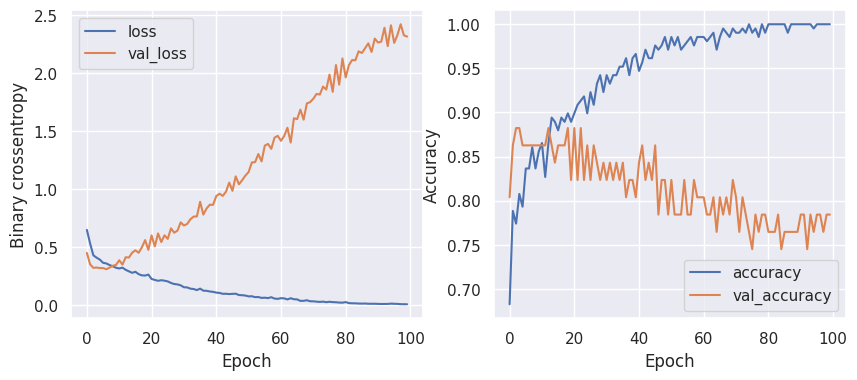

2/2 [==============================] - 0s 4ms/step - loss: 2.3169 - accuracy: 0.7843
Validation Loss: 2.316898822784424
Validation Accuracy: 0.7843137383460999
32 nodes, dropout: 0, learning_rate: 0.01, batch_size: 64


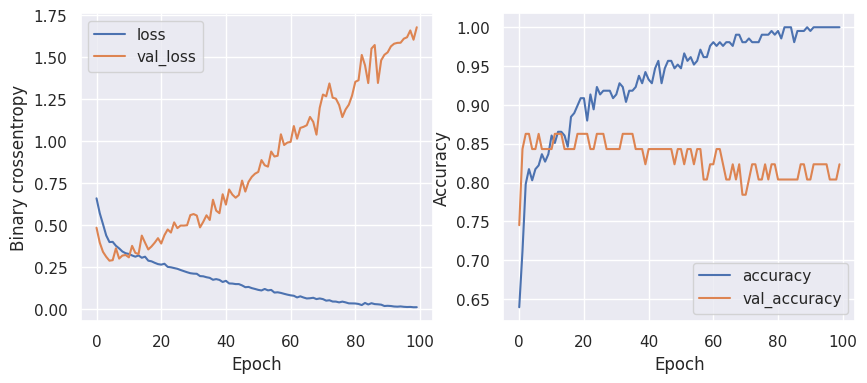

2/2 [==============================] - 0s 4ms/step - loss: 1.6793 - accuracy: 0.8235
Validation Loss: 1.679267406463623
Validation Accuracy: 0.8235294222831726
32 nodes, dropout: 0, learning_rate: 0.01, batch_size: 128


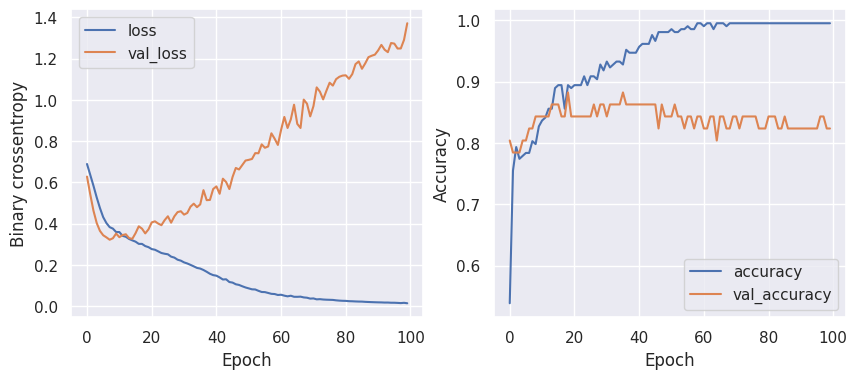

2/2 [==============================] - 0s 12ms/step - loss: 1.3712 - accuracy: 0.8235
Validation Loss: 1.3712021112442017
Validation Accuracy: 0.8235294222831726
32 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 32


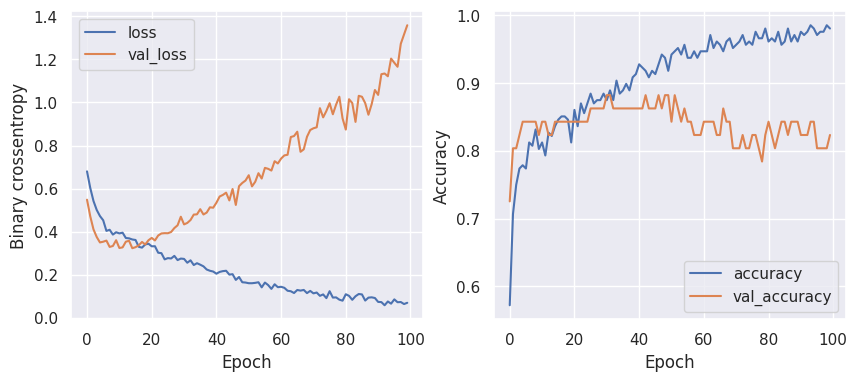

2/2 [==============================] - 0s 6ms/step - loss: 1.3588 - accuracy: 0.8235
Validation Loss: 1.3587559461593628
Validation Accuracy: 0.8235294222831726
32 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 64


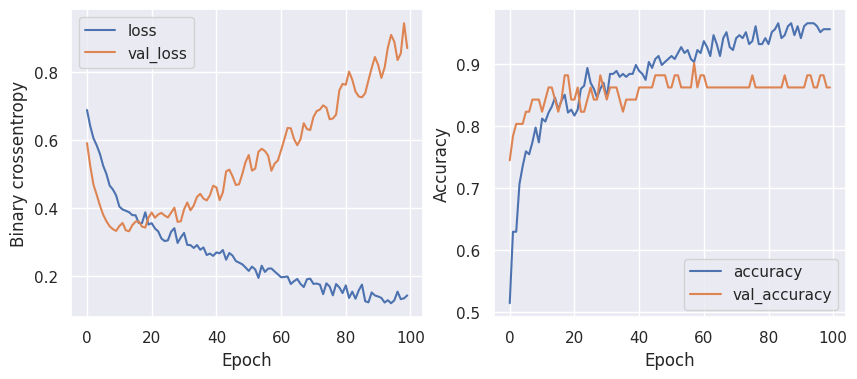

2/2 [==============================] - 0s 6ms/step - loss: 0.8703 - accuracy: 0.8627
Validation Loss: 0.8702830672264099
Validation Accuracy: 0.8627451062202454
32 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 128


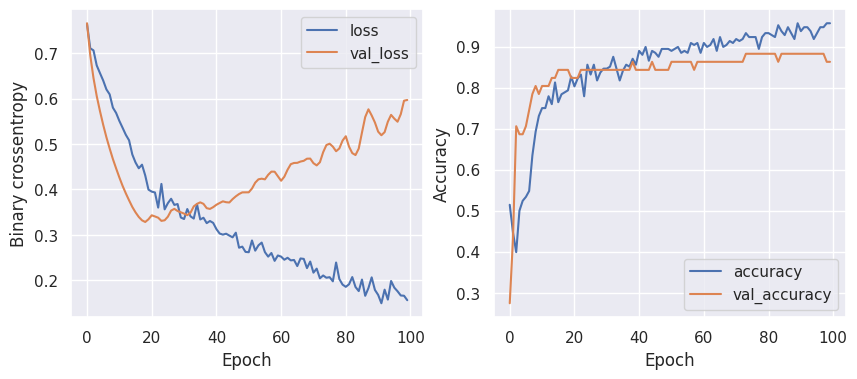

2/2 [==============================] - 0s 9ms/step - loss: 0.5972 - accuracy: 0.8627
Validation Loss: 0.5972000956535339
Validation Accuracy: 0.8627451062202454
32 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 32


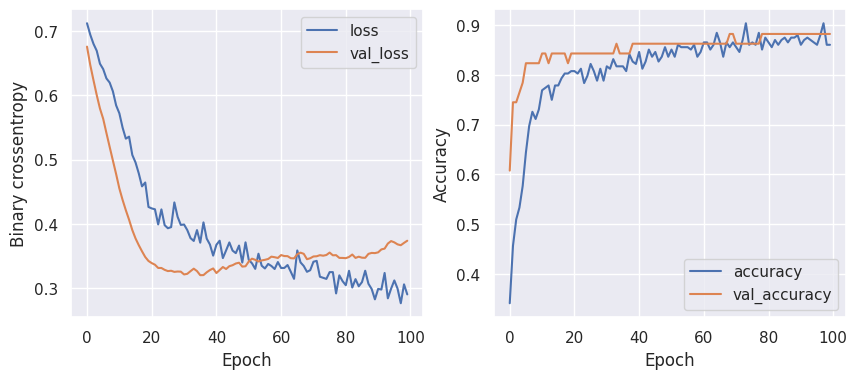

2/2 [==============================] - 0s 5ms/step - loss: 0.3740 - accuracy: 0.8824
Validation Loss: 0.37400001287460327
Validation Accuracy: 0.8823529481887817
32 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 64


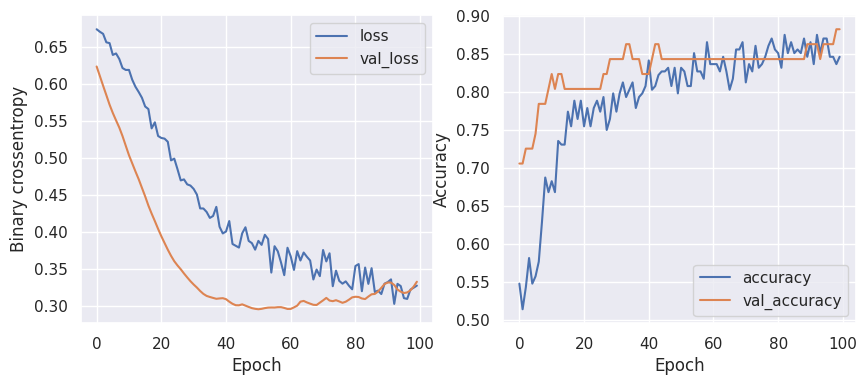

2/2 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8824
Validation Loss: 0.3322528004646301
Validation Accuracy: 0.8823529481887817
32 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 128


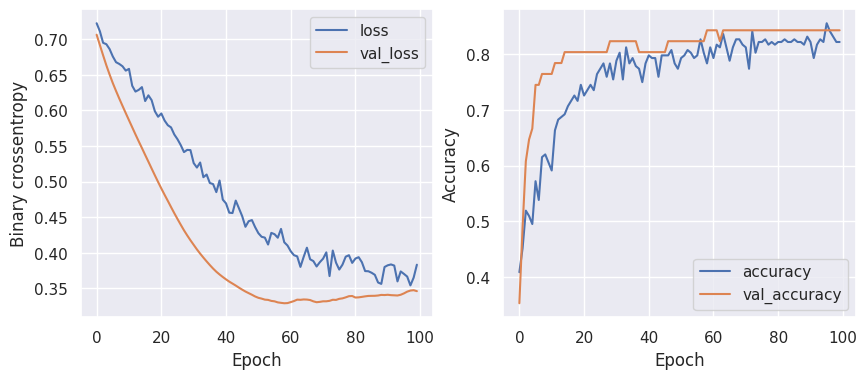

2/2 [==============================] - 0s 6ms/step - loss: 0.3462 - accuracy: 0.8431
Validation Loss: 0.34615930914878845
Validation Accuracy: 0.843137264251709
32 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 32


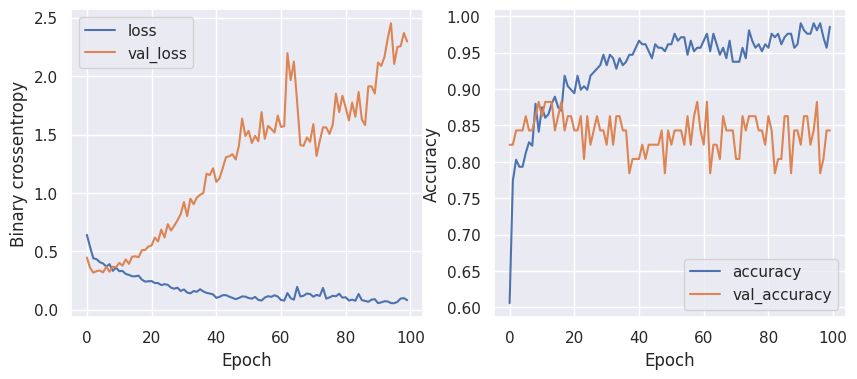

2/2 [==============================] - 0s 8ms/step - loss: 2.2967 - accuracy: 0.8431
Validation Loss: 2.296696662902832
Validation Accuracy: 0.843137264251709
32 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 64


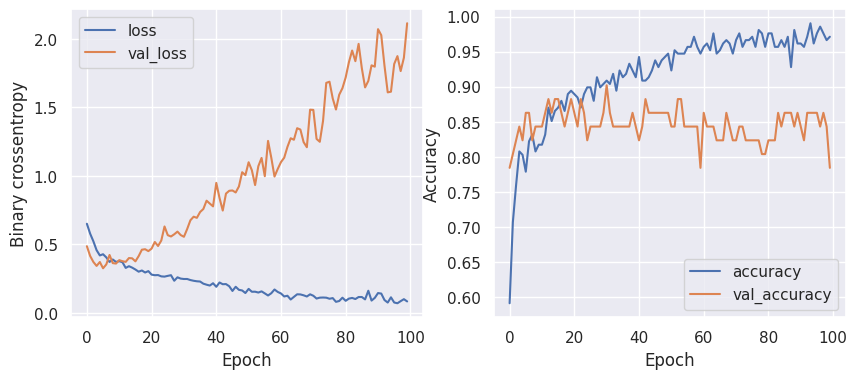

2/2 [==============================] - 0s 6ms/step - loss: 2.1152 - accuracy: 0.7843
Validation Loss: 2.115178108215332
Validation Accuracy: 0.7843137383460999
32 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 128


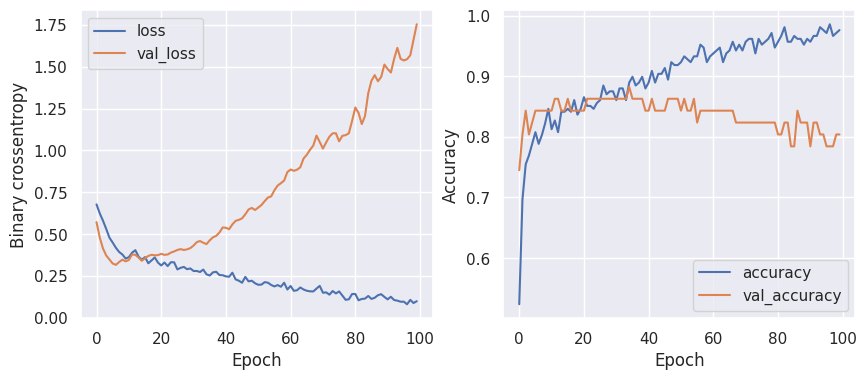

2/2 [==============================] - 0s 5ms/step - loss: 1.7542 - accuracy: 0.8039
Validation Loss: 1.7542458772659302
Validation Accuracy: 0.8039215803146362
64 nodes, dropout: 0, learning_rate: 0.005, batch_size: 32


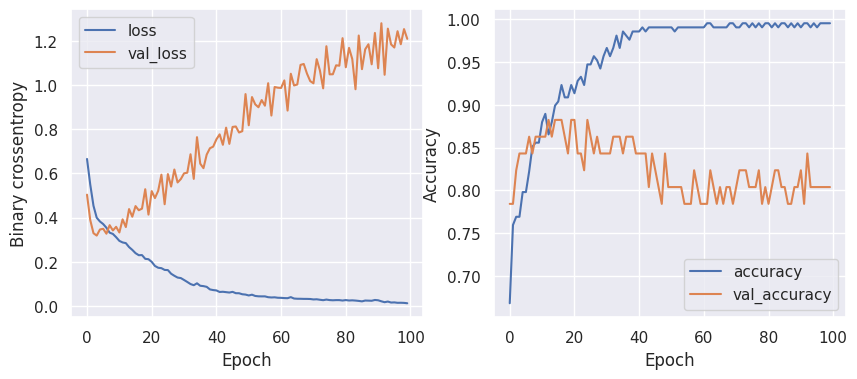

2/2 [==============================] - 0s 5ms/step - loss: 1.2095 - accuracy: 0.8039
Validation Loss: 1.2094815969467163
Validation Accuracy: 0.8039215803146362
64 nodes, dropout: 0, learning_rate: 0.005, batch_size: 64


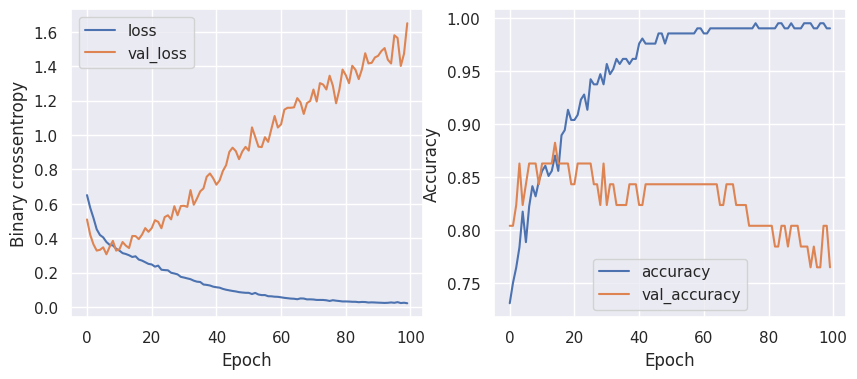

2/2 [==============================] - 0s 11ms/step - loss: 1.6511 - accuracy: 0.7647
Validation Loss: 1.6510629653930664
Validation Accuracy: 0.7647058963775635
64 nodes, dropout: 0, learning_rate: 0.005, batch_size: 128


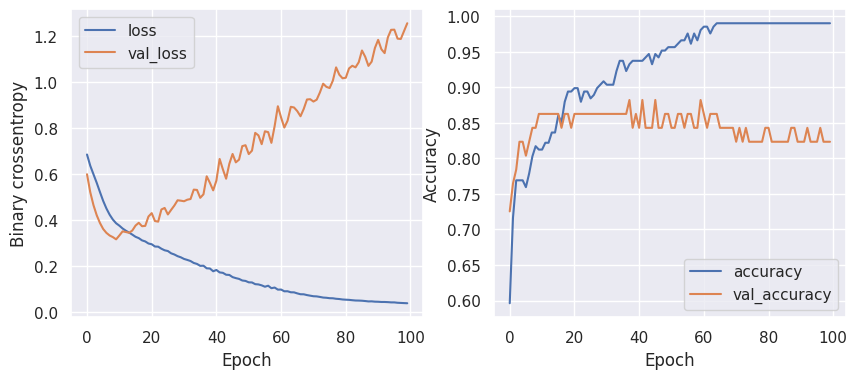

2/2 [==============================] - 0s 8ms/step - loss: 1.2554 - accuracy: 0.8235
Validation Loss: 1.2553541660308838
Validation Accuracy: 0.8235294222831726
64 nodes, dropout: 0, learning_rate: 0.001, batch_size: 32


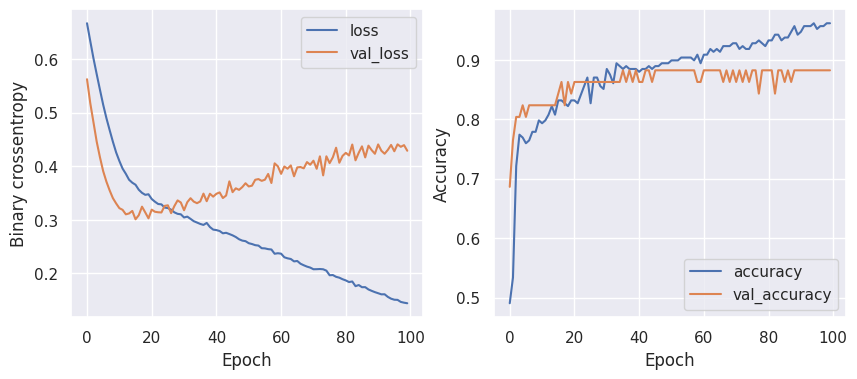

2/2 [==============================] - 0s 5ms/step - loss: 0.4289 - accuracy: 0.8824
Validation Loss: 0.42892342805862427
Validation Accuracy: 0.8823529481887817
64 nodes, dropout: 0, learning_rate: 0.001, batch_size: 64


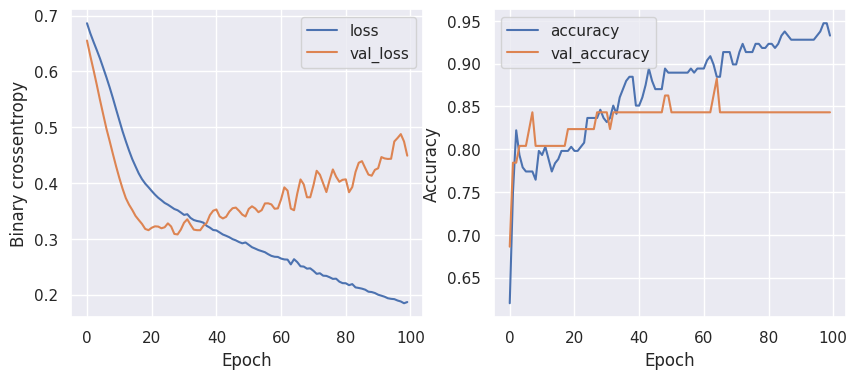

2/2 [==============================] - 0s 5ms/step - loss: 0.4491 - accuracy: 0.8431
Validation Loss: 0.4491206109523773
Validation Accuracy: 0.843137264251709
64 nodes, dropout: 0, learning_rate: 0.001, batch_size: 128


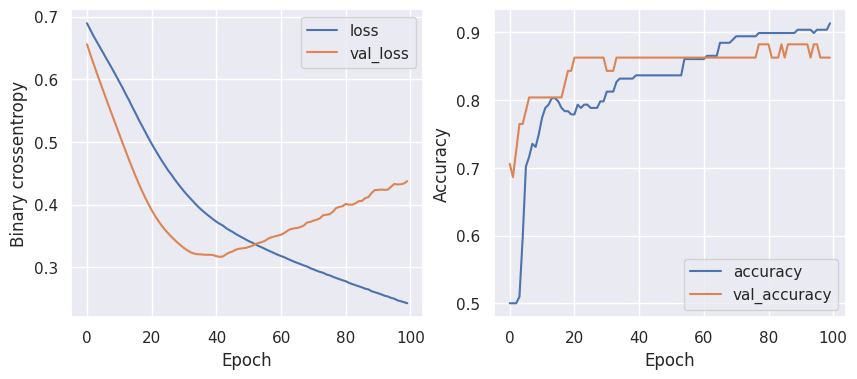

2/2 [==============================] - 0s 9ms/step - loss: 0.4374 - accuracy: 0.8627
Validation Loss: 0.4374082684516907
Validation Accuracy: 0.8627451062202454
64 nodes, dropout: 0, learning_rate: 0.01, batch_size: 32


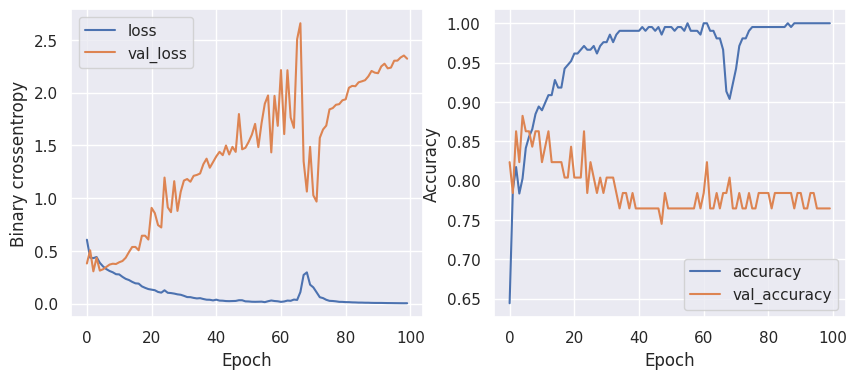

2/2 [==============================] - 0s 7ms/step - loss: 2.3212 - accuracy: 0.7647
Validation Loss: 2.32116961479187
Validation Accuracy: 0.7647058963775635
64 nodes, dropout: 0, learning_rate: 0.01, batch_size: 64


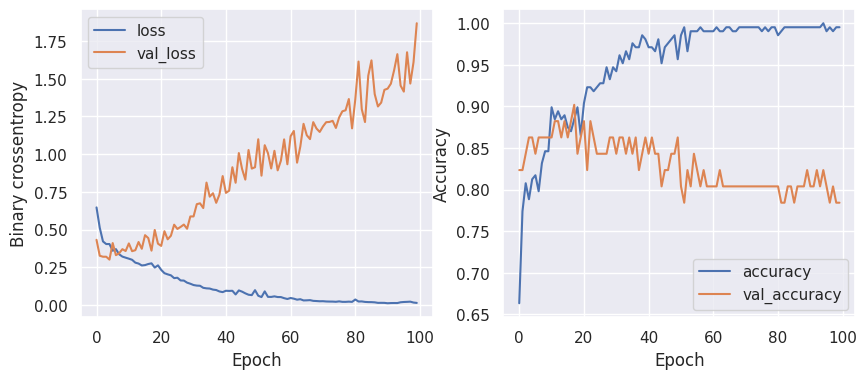

2/2 [==============================] - 0s 8ms/step - loss: 1.8678 - accuracy: 0.7843
Validation Loss: 1.8678489923477173
Validation Accuracy: 0.7843137383460999
64 nodes, dropout: 0, learning_rate: 0.01, batch_size: 128


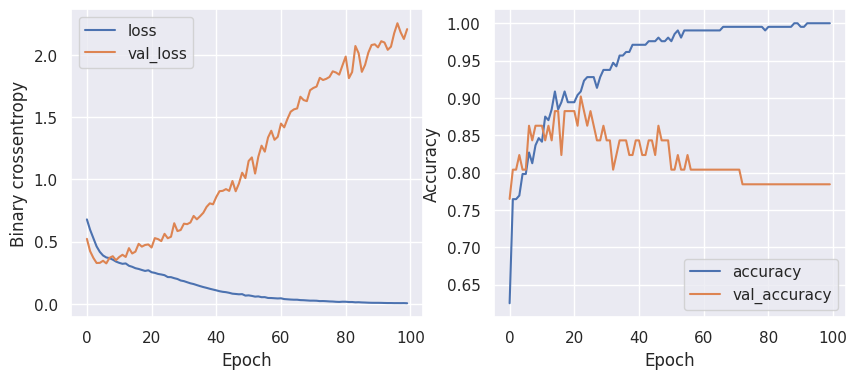

2/2 [==============================] - 0s 7ms/step - loss: 2.2072 - accuracy: 0.7843
Validation Loss: 2.2071847915649414
Validation Accuracy: 0.7843137383460999
64 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 32


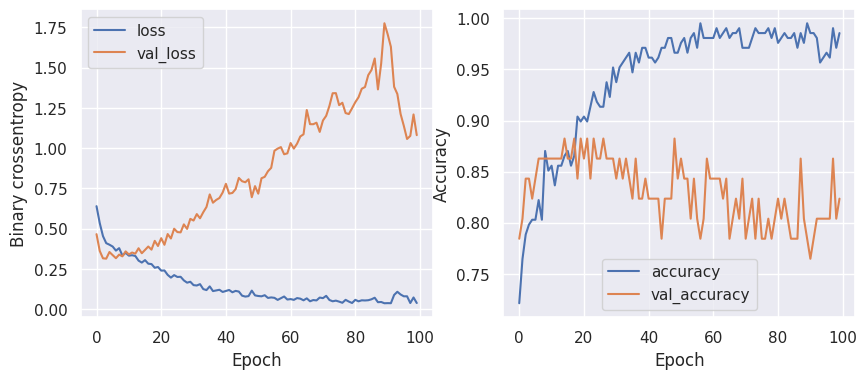

2/2 [==============================] - 0s 7ms/step - loss: 1.0809 - accuracy: 0.8235
Validation Loss: 1.0808628797531128
Validation Accuracy: 0.8235294222831726
64 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 64


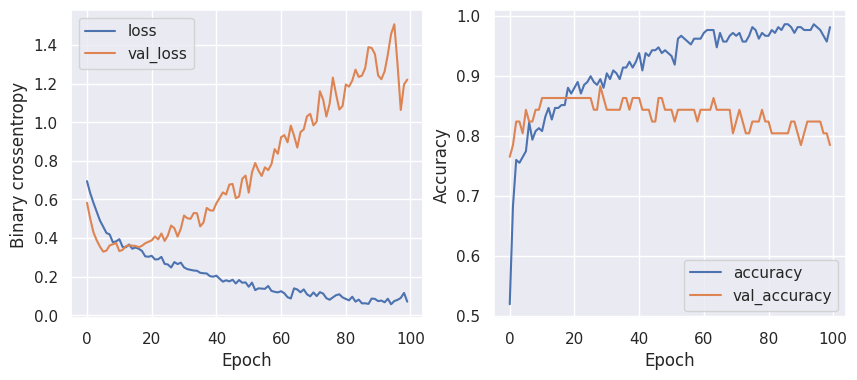

2/2 [==============================] - 0s 5ms/step - loss: 1.2208 - accuracy: 0.7843
Validation Loss: 1.2207952737808228
Validation Accuracy: 0.7843137383460999
64 nodes, dropout: 0.2, learning_rate: 0.005, batch_size: 128


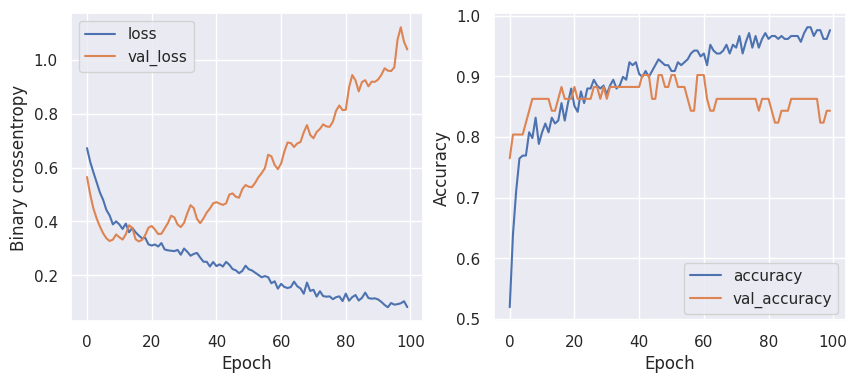

2/2 [==============================] - 0s 7ms/step - loss: 1.0395 - accuracy: 0.8431
Validation Loss: 1.0395452976226807
Validation Accuracy: 0.843137264251709
64 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 32


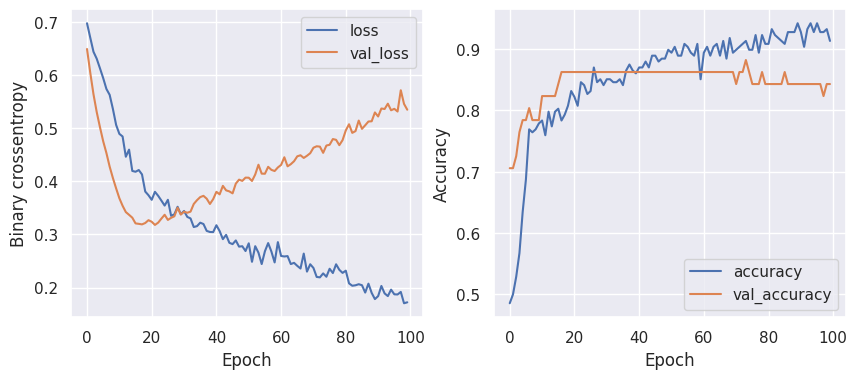

2/2 [==============================] - 0s 7ms/step - loss: 0.5348 - accuracy: 0.8431
Validation Loss: 0.5348160862922668
Validation Accuracy: 0.843137264251709
64 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 64


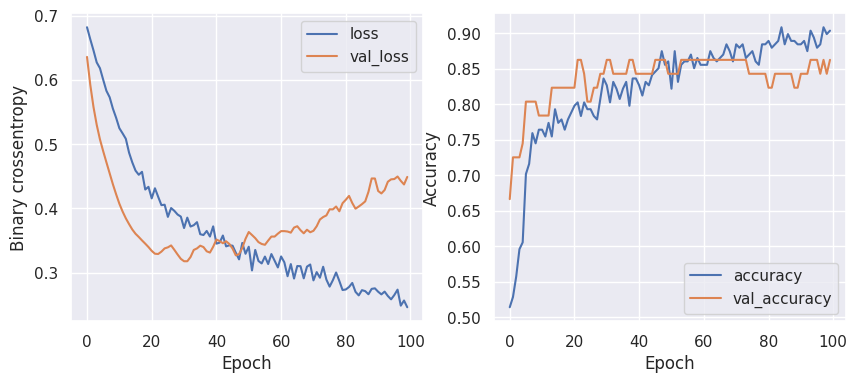

2/2 [==============================] - 0s 11ms/step - loss: 0.4488 - accuracy: 0.8627
Validation Loss: 0.44882893562316895
Validation Accuracy: 0.8627451062202454
64 nodes, dropout: 0.2, learning_rate: 0.001, batch_size: 128


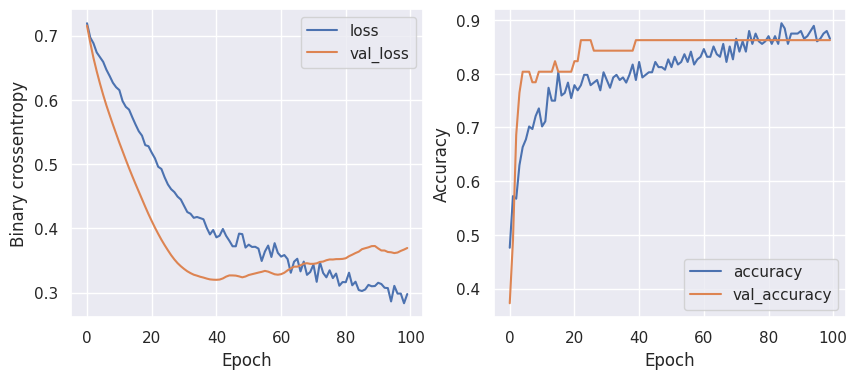

2/2 [==============================] - 0s 6ms/step - loss: 0.3696 - accuracy: 0.8627
Validation Loss: 0.3696158230304718
Validation Accuracy: 0.8627451062202454
64 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 32


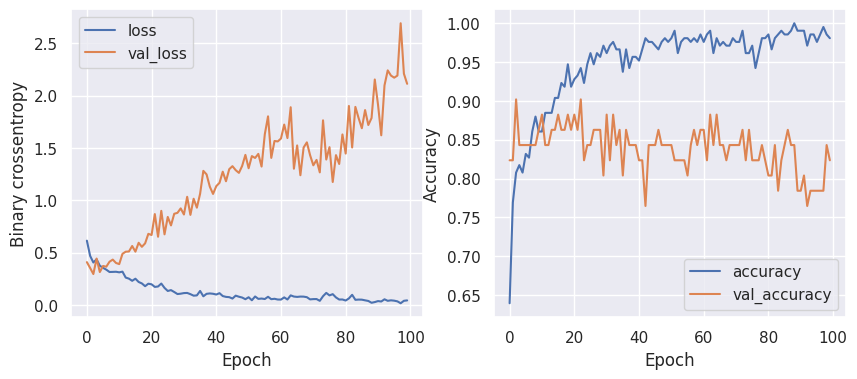

2/2 [==============================] - 0s 5ms/step - loss: 2.1129 - accuracy: 0.8235
Validation Loss: 2.112865447998047
Validation Accuracy: 0.8235294222831726
64 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 64


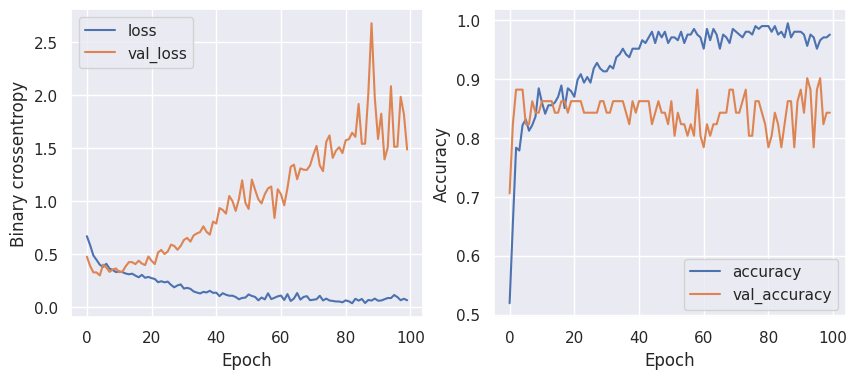

2/2 [==============================] - 0s 11ms/step - loss: 1.4864 - accuracy: 0.8431
Validation Loss: 1.486425757408142
Validation Accuracy: 0.843137264251709
64 nodes, dropout: 0.2, learning_rate: 0.01, batch_size: 128


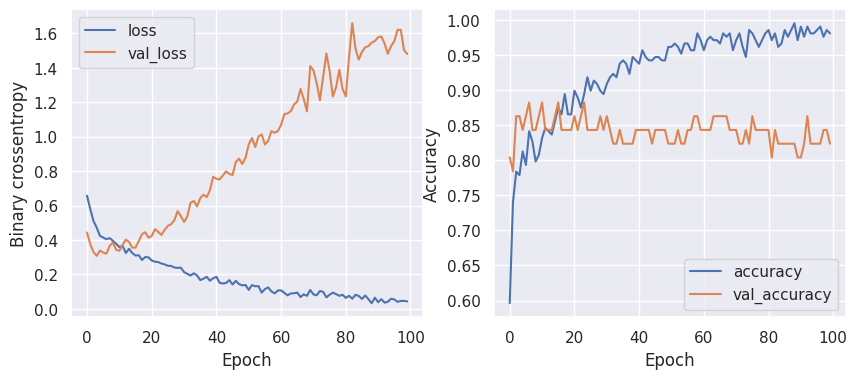

2/2 [==============================] - 0s 11ms/step - loss: 1.4803 - accuracy: 0.8235
Validation Loss: 1.480344533920288
Validation Accuracy: 0.8235294222831726


In [97]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16,32,64]:
  for dropout in [0,0.2]:
    for learning_rate in [0.005, 0.001, 0.01]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout: {dropout}, learning_rate: {learning_rate}, batch_size: {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout, learning_rate, batch_size, epochs)
        plot_hist(history)
        val_loss, val_accuracy = model.evaluate(X_val, y_val)
        print("Validation Loss:", val_loss)
        print("Validation Accuracy:", val_accuracy)
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [99]:
y_predict = least_loss_model.predict(X_test)
y_predict = (y_predict > 0.5).astype(int).reshape(-1,)

2/2 [==============================] - 0s 4ms/step


In [100]:
y_predict

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1])

In [101]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       0.80      1.00      0.89        32

    accuracy                           0.84        51
   macro avg       0.90      0.79      0.81        51
weighted avg       0.87      0.84      0.83        51

